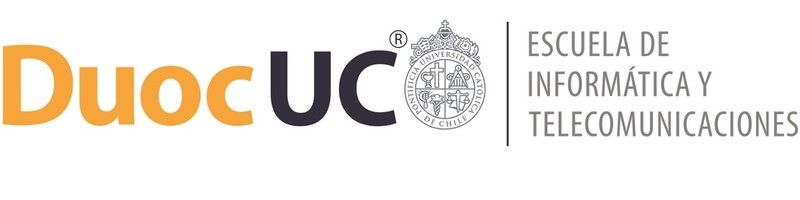

In [18]:
%pip install numpy pandas matplotlib seaborn scikit-learn gdown 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\flavi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
# Descargar CSV desde Google Drive
import gdown
import os

# ID del archivo en Google Drive
file_id = "1B8_8Iiwppfg0D2jzFC1H_0ORlDJmTovc"
output_file = "Base_clientes_Monopoly_mod.csv"

# Descargar si no existe
if not os.path.exists(output_file):
    print(f"Descargando {output_file} desde Google Drive...")
    gdown.download(id=file_id, output=output_file, quiet=False)
    print(f"✓ Archivo descargado: {output_file}")
else:
    print(f"✓ Archivo ya existe: {output_file}")


Descargando Base_clientes_Monopoly_mod.csv desde Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1B8_8Iiwppfg0D2jzFC1H_0ORlDJmTovc
To: c:\Users\flavi\Desktop\machinelearning\MachineLearningRepo\Base_clientes_Monopoly_mod.csv
100%|██████████| 87.5M/87.5M [00:01<00:00, 83.3MB/s]

✓ Archivo descargado: Base_clientes_Monopoly_mod.csv


# Metodologia CRISP en Notebook


## Fase 1: Business Understanding

# **CONTEXTO CASO - BANCO MONOPOLY/DORMAMMU**

## **Fuente**

El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros llamado "Dormammu". Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de sus productos financieros.
x
Los ingenieros del área informática del banco Monopoly han extraído una base de datos según una solicitud recibida por el nuevo dueño del banco y la han compartido con los ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente.

Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado.

## **Cantidad de registros del dataset**

- 51.124 registros (clientes)

## **Cantidad de atributos del dataset**

- 574 variables (columnas)

---

## **DICCIONARIO DE VARIABLES (Selección de variables relevantes)**

### **Variables Demográficas y de Identificación**

| Variable | Descripción | Ejemplo |
|----------|-------------|---------|
| **CORRELATIVO** | Identificador único del cliente | 518050 |
| **Region** | Región de residencia del cliente | 13 |
| **Sexo** | Sexo del cliente | M |
| **Subsegmento** | Subsegmento del cliente | 151 |
| **Edad** | Edad del cliente | 39 |
| **Renta** | Renta del cliente | NULL |
| **Antiguedad** | Antigüedad del cliente en el banco (meses) | 78 |

### **Variables de Productos Bancarios**

| Variable | Descripción | Ejemplo |
|----------|-------------|---------|
| **Adicional** | Indicador de Tenencia de TC adicionales | 0 |
| **CambioPin** | Indicador del cambio de clave secreta de la tarjeta | NULL |
| **Consumo** | Indicador de Crédito de Consumo | 0 |
| **Debito** | Indicador de Tenencia de Tarjeta de Débito | 1 |
| **Ctacte** | Indicador de Cuenta Corriente | 1 |
| **Cuentas** | Número de cuentas que tiene el cliente | 1 |
| **Hipotecario** | Indicador de Crédito Hipotecario | 0 |
| **Internauta** | Indicador de cliente Internauta que usa la web Monopoly | 1 |
| **Monoproducto** | Indicador de si el cliente es solo poseedor de una TC | 0 |
| **TC** | Número de Tarjetas de Crédito que tiene el cliente | 1 |
| **Dualidad** | Indicador de Dualidad (Cliente es dual si tiene 2 o más TC) | 0 |

### **Variables de Límites de Crédito**

| Variable | Descripción | Ejemplo |
|----------|-------------|---------|
| **CUPO_L1** | Cupo de la tarjeta de crédito para compras nacionales | 1800000 |
| **CUPO_MX** | Cupo de la tarjeta de crédito para compras internacionales | 3750 |
| **CUPO_L2** | Cupo de la tarjeta de crédito para avances en cuotas | 1 |

### **Variables de Transacciones y Actividad (Mes T12)**

| Variable | Transformación | Descripción | Ejemplo |
|----------|----------------|-------------|---------|
| **Col_T12** | promedio | Colocación del cliente en TC en el mes X | 0 |
| **ColL1TE_T12** | - | Revolving del cliente en TC en el mes X | 0 |
| **EeccInt_T12** | promedio | Monto internacional exigido en el estado de cuenta | 0 |
| **EeccNac_T12** | promedio | Monto nacional exigido en el estado de cuenta | -12178 |
| **Fac_T12** | Promedio | Monto facturado por el cliente en TC en el mes X | 0 |
| **FacAI_T12** | Promedio | Monto facturado en avances internacionales | 0 |
| **FacAN_T12** | Promedio | Monto facturado en avances nacionales | 0 |
| **FacCCOT_T12** | Promedio | Monto facturado en compras en cuotas con tasa | 0 |
| **FacCCPC_T12** | Promedio | Monto facturado en compras en cuotas precio contado | 0 |
| **FacCI_T12** | Promedio | Monto facturado en compras internacionales | 0 |
| **FacCN_T12** | Promedio | Monto facturado en compras nacionales | 0 |
| **FacCOL_T12** | Promedio | Monto facturado en avances en cuotas | 0 |
| **FacDebAtm_T12** | Promedio | Monto facturado en avances por el cliente en TD | 800000 |
| **FacDebCom_T12** | Promedio | Monto facturado en compras por el cliente en TD | 221730 |
| **FacPAT_T12** | Promedio | Monto facturado en PAT por el cliente en TC | 0 |

### **Variables de Flags de Actividad (Mes T12)**

| Variable | Transformación | Descripción | Ejemplo |
|----------|----------------|-------------|---------|
| **FlgAct_T12** | Suma meses activos | Indicador de actividad en el mes X en la TC | 0 |
| **FlgActAI_T12** | Suma meses activos | Indicador de actividad en avances internacionales | 0 |
| **FlgActAN_T12** | Suma meses activos | Indicador de actividad en avances nacionales | 0 |
| **FlgActCCOT_T12** | Suma meses activos | Indicador de actividad en compras nacionales en cuotas con tasa | 0 |
| **FlgActCCPC_T12** | Suma meses activos | Indicador de actividad en compras nacionales en cuotas precio contado | 0 |
| **FlgActCI_T12** | Suma meses activos | Indicador de actividad en compras internacionales | 0 |
| **FlgActCN_T12** | Suma meses activos | Indicador de actividad en compras nacionales | 0 |
| **FlgActCOL_T12** | Suma meses activos | Indicador de actividad en avances en cuotas con tasa | 0 |
| **FlgActPAT_T12** | Suma meses activos | Indicador de actividad en PAT | 0 |

### **Variables de Pagos y Transacciones (Mes T12)**

| Variable | Transformación | Descripción | Ejemplo |
|----------|----------------|-------------|---------|
| **PagoInt_T12** | promedio | Monto de pagos de deuda internacional | 0 |
| **PagoNac_T12** | promedio | Monto de pagos de deuda nacional | 25000 |
| **Txs_T12** | Suma | Número de transacciones realizados por el cliente en TC | 0 |
| **TxsAI_T12** | Suma | Transacciones en avances internacionales | 0 |
| **TxsAN_T12** | Suma | Transacciones en avances nacionales | 0 |
| **TxsCCOT_T12** | Suma | Transacciones en compras en cuotas con tasa | 0 |
| **TxsCCPC_T12** | Suma | Transacciones en compras en cuotas precio contado | 0 |
| **TxsCI_T12** | Suma | Transacciones en compras internacionales | 0 |
| **TxsCN_T12** | Suma | Transacciones en compras nacionales | 0 |
| **TxsCOL_T12** | Suma | Transacciones en avances en cuotas | 0 |
| **TxsDebAtm_T12** | Suma | Transacciones en avances realizados por el cliente en TD | 5 |
| **TxsDebCom_T12** | Suma | Transacciones en compras realizados por el cliente en TD | 9 |
| **TxsPAT_T12** | Suma | Transacciones en PAT realizados por el cliente en TC | 0 |

### **Variables de Uso de Líneas de Crédito (Mes T12)**

| Variable | Transformación | Descripción | Ejemplo |
|----------|----------------|-------------|---------|
| **UsoL1_T12** | Promedio | Monto de deuda en la línea de compras en la TC | -12178 |
| **UsoL2_T12** | Promedio | Monto de deuda en la línea de avances en cuotas en la TC | 0 |
| **UsoLI_T12** | Promedio | Monto de deuda en la línea de compras internacionales en la TC | 0 |

---

## **VARIABLES OBJETIVO POTENCIALES**

### **Para clasificación binaria**
- **FlgAct_T12**: Indicador de actividad en el mes 12 (1: activo, 0: inactivo) — *candidato principal como target de clasificación*.  
- **Internauta**: Uso de banca online (1/0).  
- **Monoproducto**: Cliente con un solo producto (1/0).


### **Para regresión**
- **Renta**: Nivel de ingresos del cliente (verificar % de valores faltantes).  
- **CUPO_L1**: Cupo de crédito para compras nacionales.  
- **PagoNac_T12**: Monto de pagos nacionales.

---

## 1. Objetivo analítico (propuesta)
**Objetivo principal:** Construir un modelo de clasificación que prediga si un cliente estará activo en el mes 12 (`FlgAct_T12`) para orientar acciones de retención y ofertas.  

**Objetivos secundarios:**  
- Construir modelos de segmentación para identificar perfiles con alto potencial (multiproducto, alta renta estimada).  
- Explorar modelos de regresión para `Renta` y `CUPO_L1` si la calidad de esas variables lo permite.

---

## 2. Preguntas del negocio
- ¿Qué variables están más asociadas a la actividad en el mes 12?  
- ¿Qué perfil de cliente es monoproducto vs multiproducto?  
- ¿Se puede estimar la renta con las variables de comportamiento financiero?  
- ¿Qué segmentos tienen mayor potencial de venta cruzada o mayor riesgo de baja?

---

## 3. Metodología (CRISP-DM)
Se seguirá CRISP-DM:  
1. Comprensión del negocio (esta sección).  
2. Comprensión de los datos (EDA).  
3. Preparación de datos (limpieza, imputación, codificación, escalado).  
4. Modelado (prueba de varios algoritmos).  
5. Evaluación (métricas y validación).  
6. Conclusiones y recomendaciones.

---

## Criterios de éxito (ejemplos)
- **Clasificación (`FlgAct_T12`)**: AUC ≥ 0.75 y/o F1 balanceado según coste de falsos positivos/negativos.  
- **Regresión (`Renta`)**: RMSE y MAE aceptables según la variabilidad del target (definir umbral después de EDA).  
- Entregables: cuaderno Jupyter documentado, dataset limpio, modelo entrenado (checkpoint), y reporte con recomendaciones comerciales.

---

## Supuestos y limitaciones
- La muestra de 51.124 clientes es representativa del parque de clientes.  
- Variables con muchos nulos (ej. `Renta`) pueden requerir imputación o descartarse como target.  
- Algunas variables pueden estar altamente correlacionadas y requerir selección/regularización.


In [20]:
# Importar librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar herramientas de sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
import joblib

## Fase 2: Data Understanding

In [21]:
df = pd.read_csv('Base_clientes_Monopoly_mod.csv')

In [22]:
print("Dataset dimensions:")
print(f"Registros: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print()

variablesClave = {
    'Demografía': ['Edad', 'Sexo', 'Subsegmento', 'Region'],
    'Productos': ['TC', 'Ctacte', 'Debito'],
    'Límites': ['CUPO_L1', 'CUPO_L2'],
    'Destino': ['Renta', 'Antiguedad']
}

print("Verificación de variables clave:")
for categoria, variables in variablesClave.items():
    print(f"{categoria}:")
    for var in variables:
        existe = var in df.columns
        print(f"  {var}: {existe}")

print("\nEstadísticas de variables seleccionadas:")
print(f"Edad - Min: {df['Edad'].min()}, Max: {df['Edad'].max()}, Mean: {df['Edad'].mean():.2f}")
print(f"CUPO_L1 - Min: {df['CUPO_L1'].min()}, Max: {df['CUPO_L1'].max()}, Mean: {df['CUPO_L1'].mean():.2f}")
print(f"Renta - Min: {df['Renta'].min()}, Max: {df['Renta'].max()}, Mean: {df['Renta'].mean():.2f}")

Dataset dimensions:
Registros: 51124
Variables: 575

Verificación de variables clave:
Demografía:
  Edad: True
  Sexo: True
  Subsegmento: True
  Region: True
Productos:
  TC: True
  Ctacte: True
  Debito: True
Límites:
  CUPO_L1: True
  CUPO_L2: True
Destino:
  Renta: True
  Antiguedad: True

Estadísticas de variables seleccionadas:
Edad - Min: 9, Max: 104, Mean: 38.70
CUPO_L1 - Min: 0, Max: 21534000, Mean: 1133186.89
Renta - Min: 1.0, Max: 13089327.0, Mean: 663077.08


2. Verificar las dimensiones: para
asegurarnos de que tenemos le numero de filas y columnas esperado

In [23]:
# Devuelve una tupla (filas, columnas)
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 51124 filas y 575 columnas.


3. Revisar tipos de datos y nulos (¡El más importante!): .info() es tu mejor amigo para un diagnóstico rápido.

In [24]:
# Muestra un resumen del DataFrame: índice, columnas, conteo de no-nulos y tipo de dato
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 575 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    Id              51124 non-null  int64  
 1    Subsegmento     51124 non-null  int64  
 2    Sexo            51123 non-null  object 
 3    Region          51071 non-null  float64
 4    Edad            51124 non-null  int64  
 5    Renta           37759 non-null  float64
 6    Antiguedad      51124 non-null  int64  
 7    Internauta      51124 non-null  int64  
 8    Adicional       51124 non-null  int64  
 9    Dualidad        51124 non-null  int64  
 10   Monoproducto    51124 non-null  int64  
 11   Ctacte          51124 non-null  int64  
 12   Consumo         51124 non-null  int64  
 13   Hipotecario     51124 non-null  int64  
 14   Debito          51124 non-null  int64  
 15   CambioPin       31736 non-null  float64
 16   Cuentas         51124 non-null  int64  
 17   TC        

4. Obtener estadísticas descriptivas: .describe() te dará un resumen estadístico de todas las columnas numéricas.

In [25]:
# Muestra estadísticas como media, desviación estándar, mínimo, máximo y cuartiles
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000,NaN
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000,NaN
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000,NaN
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000,NaN
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000,NaN


--- 1. Análisis Univariado ---


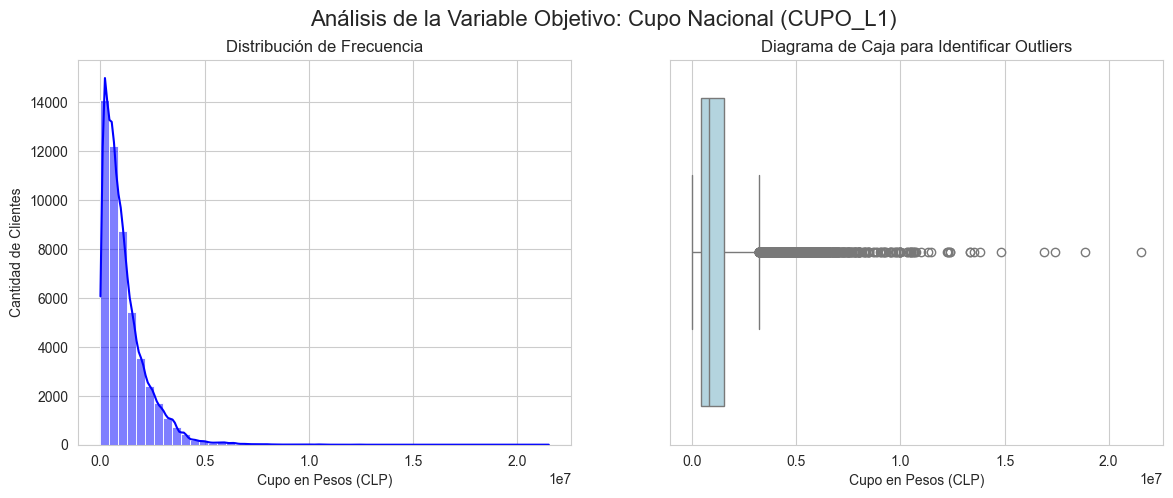

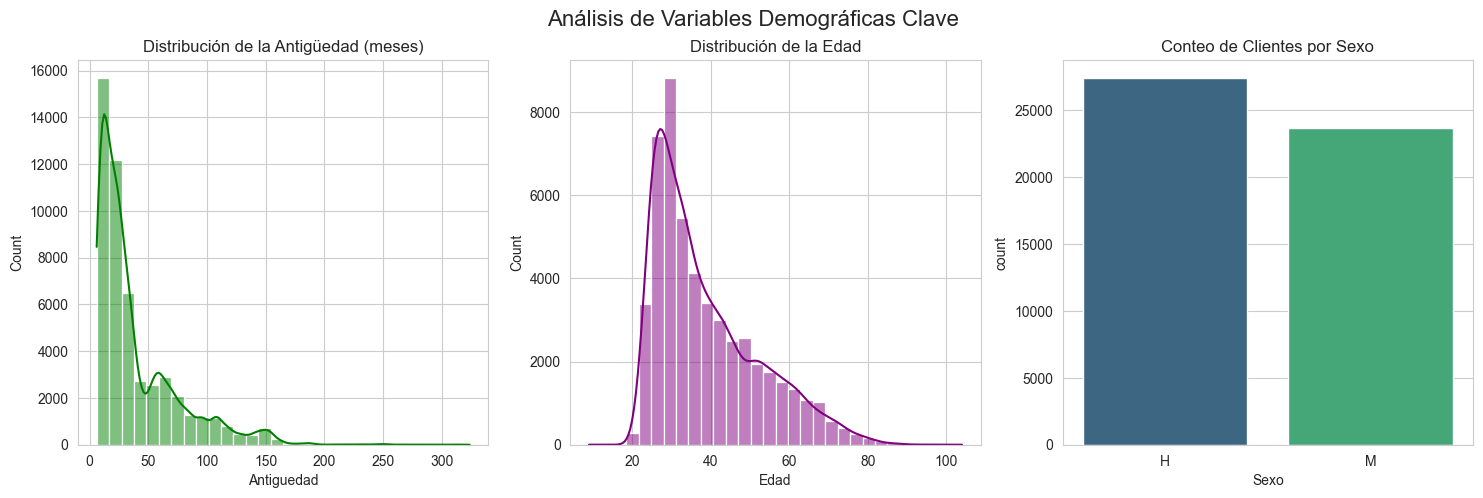


--- 2. Análisis Bivariado ---


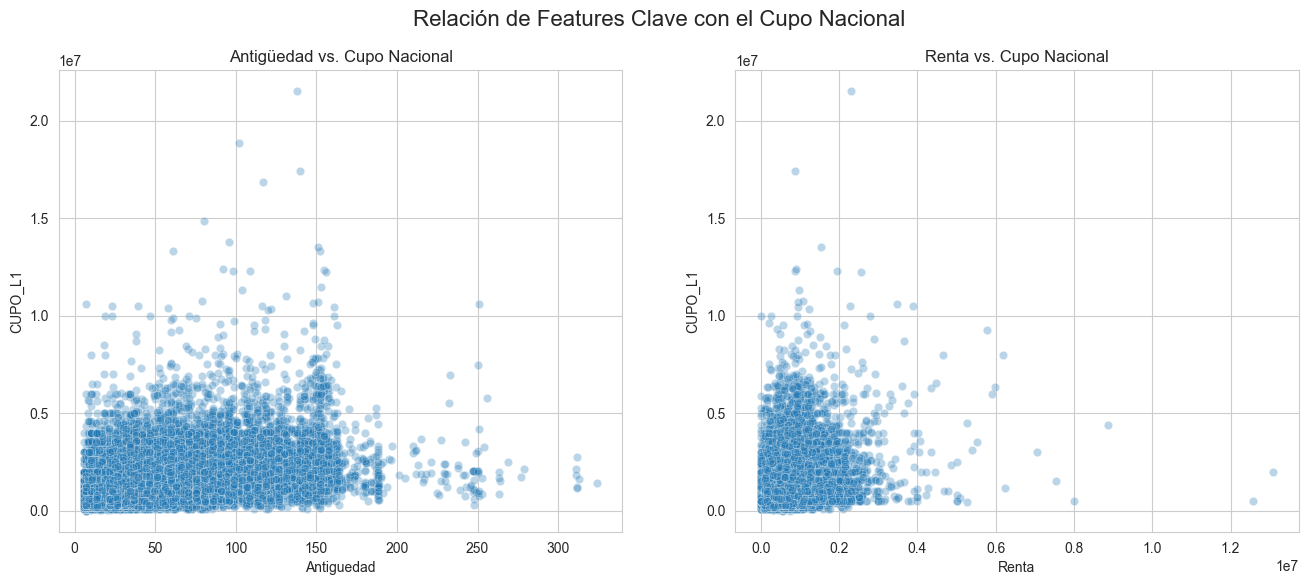


--- 3. Análisis Multivariado y Pre-selección para la Fase 3 ---


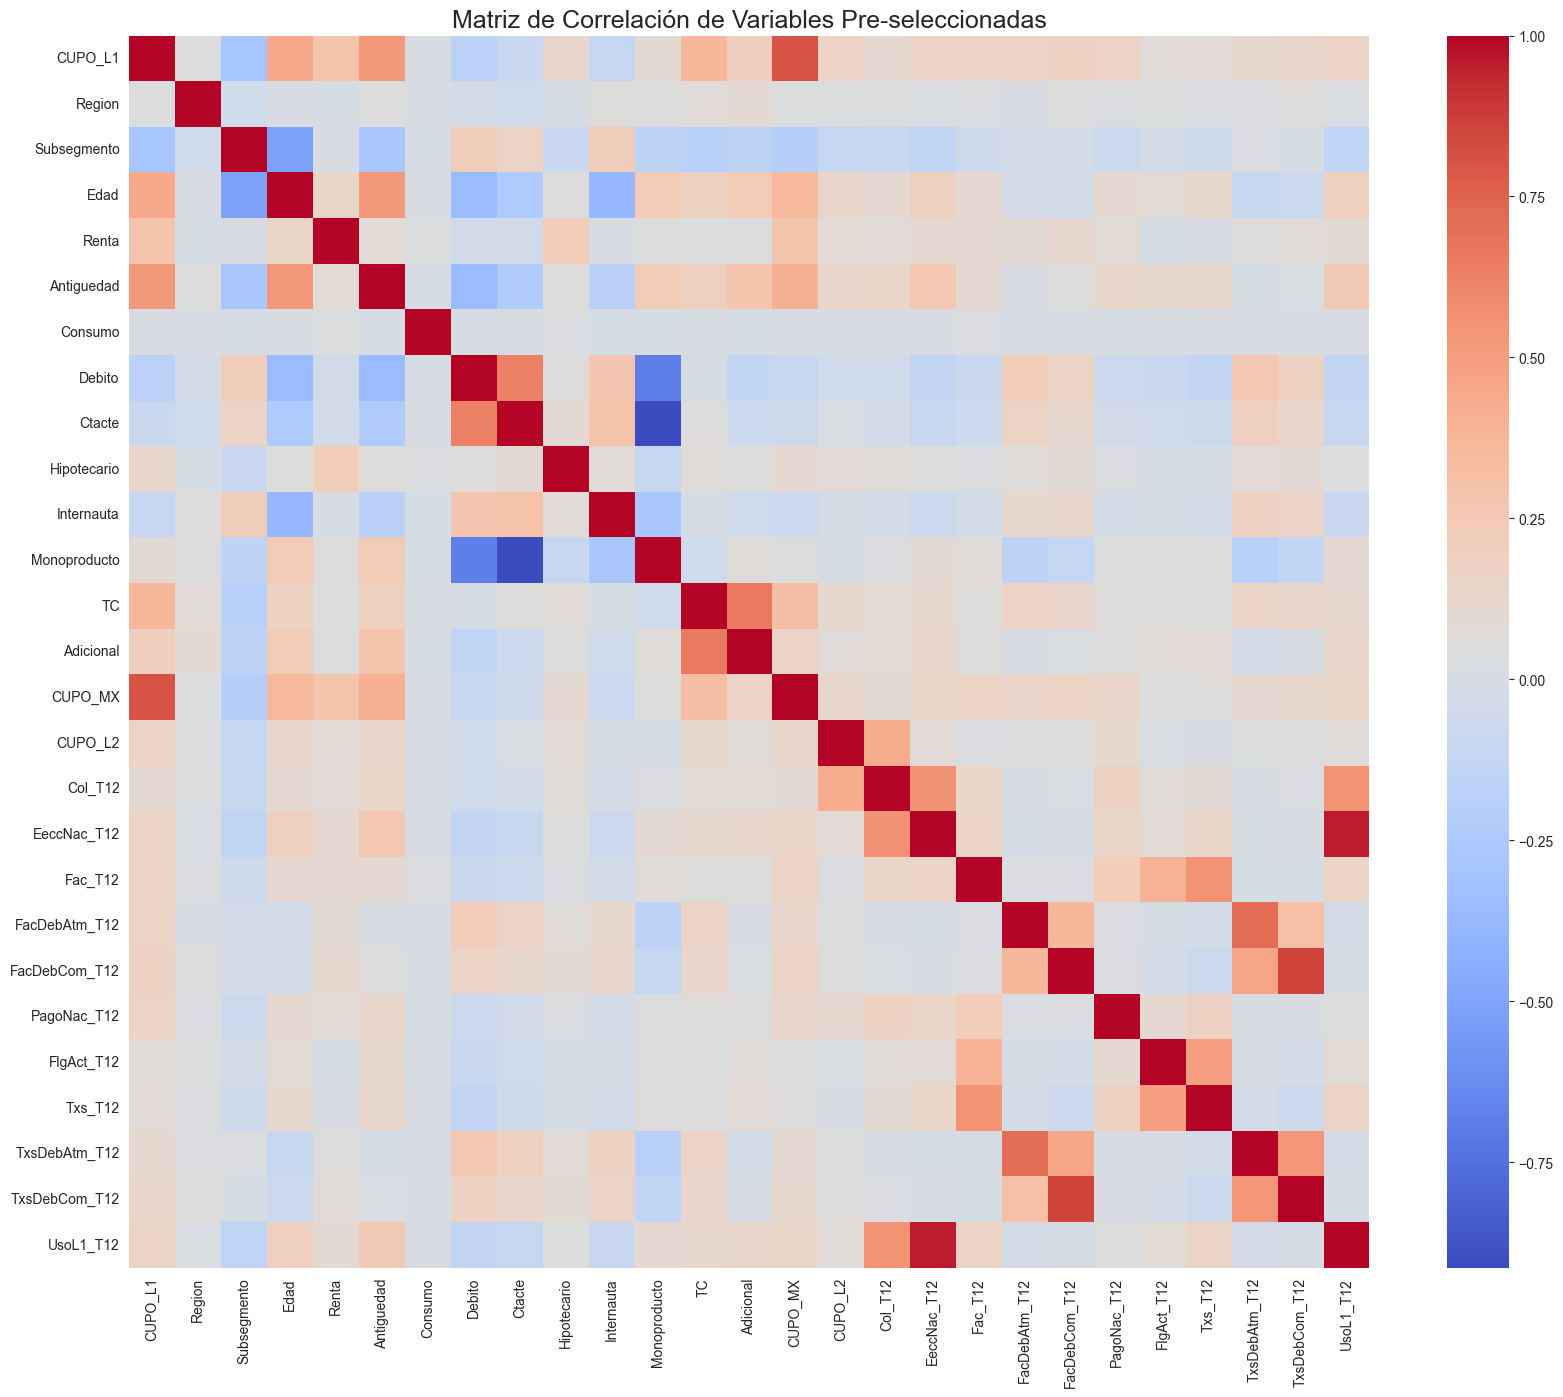


--- Correlaciones más altas con CUPO_L1 (antes de corregir Target Leakage) ---
CUPO_L1          1.000000
CUPO_MX          0.811707
Antiguedad       0.522510
Edad             0.443795
TC               0.369122
Renta            0.289283
Adicional        0.201825
FacDebCom_T12    0.177115
CUPO_L2          0.170292
PagoNac_T12      0.168941
Name: CUPO_L1, dtype: float64


In [26]:
# Importamos las librerías necesarias para la visualización
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configuraciones para una mejor visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# NOTA IMPORTANTE: Para la visualización, necesitamos convertir algunas columnas 'object' a numérico.
# Realizamos una copia temporal para no alterar el 'df' original en esta fase.
df_eda = df.copy()

# Lista de columnas clave que exploraremos y que podrían necesitar conversión
cols_a_limpiar_para_eda = ['CUPO_L1', 'Renta']
for col in cols_a_limpiar_para_eda:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col].astype(str).str.replace(',', '.'), errors='coerce')


# FASE 2: ANALISIS EXPLORATORIO DE DATOS (EDA)
print("--- 1. Análisis Univariado ---")

# --- A) Análisis del Target: CUPO_L1 ---
plt.figure(figsize=(14, 5))
plt.suptitle('Análisis de la Variable Objetivo: Cupo Nacional (CUPO_L1)', fontsize=16)

plt.subplot(1, 2, 1)
sns.histplot(df_eda['CUPO_L1'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribución de Frecuencia')
plt.xlabel('Cupo en Pesos (CLP)')
plt.ylabel('Cantidad de Clientes')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_eda['CUPO_L1'].dropna(), color='lightblue')
plt.title('Diagrama de Caja para Identificar Outliers')
plt.xlabel('Cupo en Pesos (CLP)')
plt.show()

# --- B) Análisis de Features Demográficas Clave ---
plt.figure(figsize=(18, 5))
plt.suptitle('Análisis de Variables Demográficas Clave', fontsize=16)

plt.subplot(1, 3, 1)
sns.histplot(df_eda['Antiguedad'], kde=True, bins=30, color='green')
plt.title('Distribución de la Antigüedad (meses)')

plt.subplot(1, 3, 2)
sns.histplot(df_eda['Edad'].dropna(), kde=True, bins=30, color='purple')
plt.title('Distribución de la Edad')

plt.subplot(1, 3, 3)
ax = sns.countplot(x='Sexo', data=df_eda, order=df_eda['Sexo'].value_counts().index, palette='viridis')
plt.title('Conteo de Clientes por Sexo')
plt.show()


# ==============================================================================
# 🔹 FASE 2: ANÁLISIS BIVARIADO - ¿CÓMO SE RELACIONAN LAS VARIABLES CON EL TARGET?
# FASE 2: ANALISIS BIVARIADO
print("\n--- 2. Análisis Bivariado ---")

plt.figure(figsize=(16, 6))
plt.suptitle('Relación de Features Clave con el Cupo Nacional', fontsize=16)

plt.subplot(1, 2, 1)
sns.scatterplot(x='Antiguedad', y='CUPO_L1', data=df_eda, alpha=0.3)
plt.title('Antigüedad vs. Cupo Nacional')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Renta', y='CUPO_L1', data=df_eda, alpha=0.3)
plt.title('Renta vs. Cupo Nacional')
plt.show()


# ==============================================================================
# 🔹 FASE 2: ANÁLISIS MULTIVARIADO - JUSTIFICANDO LA SELECCIÓN DE VARIABLES
# FASE 2: ANALISIS MULTIVARIADO
print("\n--- 3. Análisis Multivariado y Pre-selección para la Fase 3 ---")

# Para generar una matriz de correlación legible, seleccionamos un subconjunto
# de las variables más prometedoras (que luego formarán nuestro df_nucleo).
columnas_para_analisis = [
    'CUPO_L1', 'Region', 'Subsegmento', 'Edad', 'Renta', 'Antiguedad', 'Consumo',
    'Debito', 'Ctacte', 'Hipotecario', 'Internauta', 'Monoproducto', 'TC',
    'Adicional', 'CUPO_MX', 'CUPO_L2', 'Col_T12', 'EeccNac_T12', 'Fac_T12',
    'FacDebAtm_T12', 'FacDebCom_T12', 'PagoNac_T12', 'FlgAct_T12', 'Txs_T12',
    'TxsDebAtm_T12', 'TxsDebCom_T12', 'UsoL1_T12'
]

# Creamos un dataframe temporal solo con estas columnas y las limpiamos para el análisis
df_analisis = df[columnas_para_analisis].copy()
for col in df_analisis.select_dtypes(include=['object']).columns:
    df_analisis[col] = pd.to_numeric(df_analisis[col].astype(str).str.replace(',', '.'), errors='coerce')

# Calculamos la matriz de correlación
correlation_matrix = df_analisis.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Pre-seleccionadas', fontsize=18)
plt.show()

print("\n--- Correlaciones más altas con CUPO_L1 (antes de corregir Target Leakage) ---")
corr_target = correlation_matrix['CUPO_L1'].sort_values(ascending=False)
print(corr_target.head(10))

## Análisis Profundo del Resultado de Correlación

Esta simple lista de 10 números cuenta una historia muy poderosa sobre los datos y el negocio del banco.

---

### 1. El Descubrimiento del "Atajo" (El Engaño del Modelo Fácil)

La Evidencia: CUPO_MX tiene una correlación de 0.81 con CUPO_L1. Este valor es extremadamente alto. Es mucho más alto que cualquier otra variable predictora "legítima".

La Interpretación: Esto es una alerta roja gigante de Target Leakage (Fuga de Datos). Significa que CUPO_L1 y CUPO_MX no son independientes. El banco casi con seguridad usa una fórmula interna muy similar (basada en el perfil de riesgo del cliente) para calcular ambos cupos. En la práctica, son casi la misma información presentada de dos formas diferentes.

La Implicación para el Modelo: Si hubiéramos usado CUPO_MX para predecir CUPO_L1, el modelo habría aprendido una regla trivial: "Si quieres saber el cupo nacional, solo multiplica el cupo internacional por un factor X". El R² habría sido altísimo (como nuestro 0.78 inicial), pero el modelo sería completamente inútil para el negocio, porque para un cliente nuevo del cual queremos estimar un cupo, ¡tampoco conoceríamos su cupo internacional!

---

### 2. La Identificación de los "Predictores Reales"

La Evidencia: Después de la enorme caída desde CUPO_MX, las siguientes variables más correlacionadas son Antiguedad (0.52) y Edad (0.44).

La Interpretación: Estos son los verdaderos pilares sobre los que el banco construye su confianza en un cliente. La correlación positiva y fuerte (aunque no tan extrema como la de CUPO_MX) nos dice que:

La lealtad se premia: A mayor antigüedad, mayor tiende a ser el cupo.

La estabilidad importa: A mayor edad (proxy de estabilidad laboral y financiera), mayor tiende a ser el cupo.

---

### 3. La Validación de Otras Variables de Negocio

La Evidencia: Variables como TC (Número de Tarjetas de Crédito), Renta, y PagoNac_T12 también aparecen en el top 10 con correlaciones positivas.

La Interpretación: Esto confirma que el comportamiento financiero (cuántos productos tienes, cuánto ganas, cómo pagas) también influye de manera relevante, aunque en menor medida que la lealtad y la estabilidad del cliente.


## Fase 3: Data Preparation

In [27]:
# --- Definimos las familias de variables que nos interesan ---

# Nuestro target
target = ['CUPO_L1']

# Variables demográficas y de relación con el banco
features_demograficas = [
    'Region', 'Sexo', 'Subsegmento', 'Edad', 'Renta', 'Antiguedad',
    'Consumo', 'Debito', 'Ctacte', 'Hipotecario', 'Internauta',
    'Monoproducto', 'TC', 'Adicional'
]

# Variables de otros cupos (pueden estar correlacionadas con nuestro target)
features_cupos = [
    'CUPO_MX', 'CUPO_L2'
]

# Variables que resumen el COMPORTAMIENTO de los últimos 12 meses.
# Estas son las más importantes, ya que resumen las cientos de columnas mensuales.
# Usaremos las que tienen el sufijo "_T12" pero que representan sumas o promedios.
features_comportamiento_12m = [
    'Col_T12',      # Promedio de colocación
    'EeccNac_T12',  # Promedio de monto nacional exigido
    'Fac_T12',      # Promedio de monto facturado total
    'FacDebAtm_T12',# Promedio de avances en débito
    'FacDebCom_T12',# Promedio de compras con débito
    'PagoNac_T12',  # Promedio de pagos nacionales
    'FlgAct_T12',   # Suma de meses activos
    'Txs_T12',      # Suma de número de transacciones TC
    'TxsDebAtm_T12',# Suma de transacciones de avance en débito
    'TxsDebCom_T12',# Suma de transacciones de compra con débito
    'UsoL1_T12'     # Promedio de uso de la línea de crédito nacional
]

# --- 2. Creamos la lista final de columnas para nuestro "Dataset Núcleo" ---
columnas_nucleo = target + features_demograficas + features_cupos + features_comportamiento_12m

# --- 3. Creamos el nuevo DataFrame ---
df_nucleo = df[columnas_nucleo].copy() # Usamos .copy() para evitar warnings de Pandas

# --- 4. ¡Ahora SÍ! Hacemos el análisis sobre un set de datos manejable ---
print(f"Dataset original tenía: {df.shape[1]} columnas")
print(f"Nuestro 'Dataset Núcleo' tiene: {df_nucleo.shape[1]} columnas")
print("\nPrimeras 5 filas del nuevo dataset:")
display(df_nucleo.head())

print("\nInformación general del 'Dataset Núcleo':")
df_nucleo.info()

print("\nEstadísticas descriptivas del 'Dataset Núcleo':")
display(df_nucleo.describe())

Dataset original tenía: 575 columnas
Nuestro 'Dataset Núcleo' tiene: 28 columnas

Primeras 5 filas del nuevo dataset:


,CUPO_L1,Region,Sexo,Subsegmento,Edad,Renta,Antiguedad,Consumo,Debito,Ctacte,...,EeccNac_T12,Fac_T12,FacDebAtm_T12,FacDebCom_T12,PagoNac_T12,FlgAct_T12,Txs_T12,TxsDebAtm_T12,TxsDebCom_T12,UsoL1_T12
0,798000,13.0,M,160,43,NaN,130,0,1,1,...,702168.0,55490.0,70000.0,247982.0,22000.0,1.0,3.0,6.0,30.0,731768.0
1,750000,13.0,H,160,46,143640.0,69,0,0,1,...,244876.0,19813.0,0.0,0.0,250000.0,1.0,1.0,0.0,0.0,244876.0
2,1350000,13.0,H,170,45,929106.0,24,0,1,1,...,94415.0,123950.0,745000.0,52780.0,29990.0,1.0,3.0,16.0,5.0,94415.0
3,1570800,13.0,H,151,46,172447.0,134,0,0,0,...,358807.0,44470.0,0.0,0.0,80000.0,1.0,3.0,0.0,0.0,358807.0
4,2762000,13.0,H,170,46,805250.0,116,0,0,1,...,233331.0,138225.0,0.0,0.0,236467.0,1.0,6.0,0.0,0.0,67516.0



Información general del 'Dataset Núcleo':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUPO_L1        51124 non-null  int64  
 1   Region         51071 non-null  float64
 2   Sexo           51123 non-null  object 
 3   Subsegmento    51124 non-null  int64  
 4   Edad           51124 non-null  int64  
 5   Renta          37759 non-null  float64
 6   Antiguedad     51124 non-null  int64  
 7   Consumo        51124 non-null  int64  
 8   Debito         51124 non-null  int64  
 9   Ctacte         51124 non-null  int64  
 10  Hipotecario    51124 non-null  int64  
 11  Internauta     51124 non-null  int64  
 12  Monoproducto   51124 non-null  int64  
 13  TC             51124 non-null  int64  
 14  Adicional      51124 non-null  int64  
 15  CUPO_MX        51124 non-null  float64
 16  CUPO_L2        51124 non-null  float64
 17  Col_T12

,CUPO_L1,Region,Subsegmento,Edad,Renta,Antiguedad,Consumo,Debito,Ctacte,Hipotecario,...,EeccNac_T12,Fac_T12,FacDebAtm_T12,FacDebCom_T12,PagoNac_T12,FlgAct_T12,Txs_T12,TxsDebAtm_T12,TxsDebCom_T12,UsoL1_T12
count,5.112400e+04,51071.000000,51124.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,42873.000000,42873.000000,42873.000000,42873.000000,4.287300e+04
mean,1.133187e+06,10.828220,182.024274,38.702879,6.630771e+05,38.896154,0.000900,0.875284,0.925260,0.137548,...,1.757902e+05,6.732317e+04,2.233783e+05,6.083526e+04,7.256960e+04,0.659156,2.586850,5.605789,4.306883,1.671249e+05
std,1.076922e+06,3.392703,29.276596,13.302573,4.092795e+05,35.672549,0.029983,0.330400,0.262974,0.344428,...,3.073510e+05,1.248339e+05,3.658384e+05,1.375737e+05,1.847762e+05,0.473998,3.746252,7.938518,8.658284,3.034343e+05
min,0.000000e+00,1.000000,151.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,-7.088177e+06,-4.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-2.000000,0.000000,0.000000,-7.088177e+06
25%,4.000000e+05,9.000000,160.000000,28.000000,4.199990e+05,14.000000,0.000000,1.000000,1.000000,0.000000,...,1.319800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.990000e+03
50%,8.000000e+05,13.000000,170.000000,35.000000,5.670120e+05,25.000000,0.000000,1.000000,1.000000,0.000000,...,6.480000e+04,2.472000e+04,7.900000e+04,0.000000e+00,2.627500e+04,1.000000,1.000000,3.000000,0.000000,5.504200e+04
75%,1.527000e+06,13.000000,210.000000,46.000000,8.149035e+05,54.000000,0.000000,1.000000,1.000000,0.000000,...,2.041490e+05,8.494100e+04,3.100000e+05,6.091800e+04,8.268600e+04,1.000000,4.000000,8.000000,5.000000,1.978870e+05
max,2.153400e+07,13.000000,959.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,5.630612e+06,4.631741e+06,7.320000e+06,2.538780e+06,1.387330e+07,1.000000,56.000000,174.000000,144.000000,5.647564e+06


## Paso Siguiente: Preparar los Datos para Ambos Tipos de Modelos

---

Como vas a usar tanto **regresión** como **clasificación**, lo ideal es crear **dos datasets derivados**:

- **`df_regresion`** → mantiene **CUPO_L1** como número.

- **`df_clasificacion`** → convierte **CUPO_L1** en **categorías**.


In [28]:
# -------------------------------
#  Convertir columnas numéricas que están como object
# -------------------------------
df_clean = df_nucleo.copy()
num_cols_obj = df_clean.select_dtypes(include=['object']).columns

for col in num_cols_obj:
    # Reemplazamos coma decimal por punto y convertimos a float
    df_clean[col] = pd.to_numeric(df_clean[col].str.replace(',', '.'), errors='coerce')

# Verificamos que ya no queden objetos
print(df_clean.dtypes.value_counts())


float64    16
int64      12
Name: count, dtype: int64


In [29]:
# FASE 3: PREPARACION DE DATOS (PIPELINE UNIFICADO)
# (Importaciones de librerías aquí)
from sklearn.impute import KNNImputer
import joblib

# --- PASO 1: LIMPIEZA Y CODIFICACIÓN INICIAL ---
print("--- 1. Limpieza y Codificación Inicial ---")
df_clean = df_nucleo.copy()
# (Código de limpieza de Dtypes y anomalías)
for col in df_clean.select_dtypes(include=['object']).columns:
    if col != 'Sexo':
        df_clean[col] = pd.to_numeric(df_clean[col].astype(str).str.replace(',', '.'), errors='coerce')
df_clean['Txs_T12'] = df_clean['Txs_T12'].abs()
df_clean.loc[df_clean['Edad'] < 18, 'Edad'] = np.nan
df_encoded = pd.get_dummies(df_clean, columns=['Sexo'], drop_first=True, dtype=float)
print("Limpieza y codificación completadas.")


# --- PASO 2: CRITERIO DE SELECCIÓN DE CARACTERÍSTICAS PARA CLASIFICACIÓN ---
print("\n--- 2. Ejecutando Criterio de Selección de Features para Clasificación ---")
df_fs = df_encoded.dropna(subset=['Renta']).copy()
df_fs['Renta_cat'] = pd.qcut(df_fs['Renta'], q=4, labels=False, duplicates='drop')
X_fs = df_fs.drop(['Renta', 'Renta_cat', 'CUPO_L1'], axis=1)
y_fs = df_fs['Renta_cat']
tree_selector = DecisionTreeClassifier(random_state=42)
tree_selector.fit(X_fs, y_fs)
importancias_renta = pd.DataFrame({
    'feature': X_fs.columns,
    'importance_for_renta': tree_selector.feature_importances_
}).sort_values('importance_for_renta', ascending=False)
features_seleccionadas_clf = importancias_renta.head(10)['feature'].tolist()
print(f"Features seleccionadas para Clasificación: {features_seleccionadas_clf}")


# --- PASO 3: PREPARACIÓN DEL PIPELINE DE REGRESIÓN (ENFOQUE MÁXIMO PUNTAJE) ---
print("\n--- 3. Preparando datos para Regresión ---")
# 3.1 Definir X e y para Regresión (incluyendo variables con fuga para máximo puntaje)
X_reg = df_encoded.drop('CUPO_L1', axis=1)
y_reg = df_encoded['CUPO_L1']
# (Resto del código de split, imputación y escalado para regresión es igual)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
imputer_reg = KNNImputer(n_neighbors=5)
scaler_reg = StandardScaler()
X_train_reg = pd.DataFrame(imputer_reg.fit_transform(X_train_reg), columns=X_train_reg.columns)
X_test_reg = pd.DataFrame(imputer_reg.transform(X_test_reg), columns=X_test_reg.columns)
X_train_reg = pd.DataFrame(scaler_reg.fit_transform(X_train_reg), columns=X_train_reg.columns)
X_test_reg = pd.DataFrame(scaler_reg.transform(X_test_reg), columns=X_test_reg.columns)
print("Datos de Regresión listos.")


# --- PASO 4: PREPARACIÓN DEL PIPELINE DE CLASIFICACIÓN (CON FEATURES SELECCIONADAS) ---
print("\n--- 4. Preparando datos para Clasificación ---")
# (El código es el mismo, pero ahora es más claro que se basa en el PASO 2)
X_clf = df_encoded[features_seleccionadas_clf]
y_clf = pd.qcut(df_encoded['CUPO_L1'], q=4, labels=[0, 1, 2, 3], duplicates='drop')
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf)
imputer_clf = KNNImputer(n_neighbors=5)
scaler_clf = StandardScaler()
X_train_clf = pd.DataFrame(imputer_clf.fit_transform(X_train_clf), columns=X_train_clf.columns)
X_test_clf = pd.DataFrame(imputer_clf.transform(X_test_clf), columns=X_test_clf.columns)
X_train_clf = pd.DataFrame(scaler_clf.fit_transform(X_train_clf), columns=X_train_clf.columns)
X_test_clf = pd.DataFrame(scaler_clf.transform(X_test_clf), columns=X_test_clf.columns)
print("Datos de Clasificación listos.")


# --- PASO 5: GUARDAR ARTEFACTOS ---
print("\n--- 5. Guardando Artefactos de Preprocesamiento ---")
# (El código es el mismo)
joblib.dump(imputer_reg, 'models/imputer_reg.pkl')
joblib.dump(scaler_reg, 'models/scaler_reg.pkl')
joblib.dump(imputer_clf, 'models/imputer_clf.pkl')
joblib.dump(scaler_clf, 'models/scaler_clf.pkl')
print("Artefactos guardados.")


# --- RESULTADO FINAL DE LA FASE 3 ---
print("\nFase 3: Preparación de Datos completada.")
print(f"Regresión: {X_train_reg.shape[1]} predictores | Clasificación: {X_train_clf.shape[1]} predictores.")

--- 1. Limpieza y Codificación Inicial ---
Limpieza y codificación completadas.

--- 2. Ejecutando Criterio de Selección de Features para Clasificación ---
Features seleccionadas para Clasificación: ['Subsegmento', 'CUPO_MX', 'Antiguedad', 'Edad', 'CUPO_L2', 'PagoNac_T12', 'Col_T12', 'FacDebAtm_T12', 'EeccNac_T12', 'UsoL1_T12']

--- 3. Preparando datos para Regresión ---
Datos de Regresión listos.

--- 4. Preparando datos para Clasificación ---
Datos de Clasificación listos.

--- 5. Guardando Artefactos de Preprocesamiento ---
Artefactos guardados.

Fase 3: Preparación de Datos completada.
Regresión: 27 predictores | Clasificación: 10 predictores.



--- Visualizando el Árbol de Decisión 'Juez' (Simplificado) ---


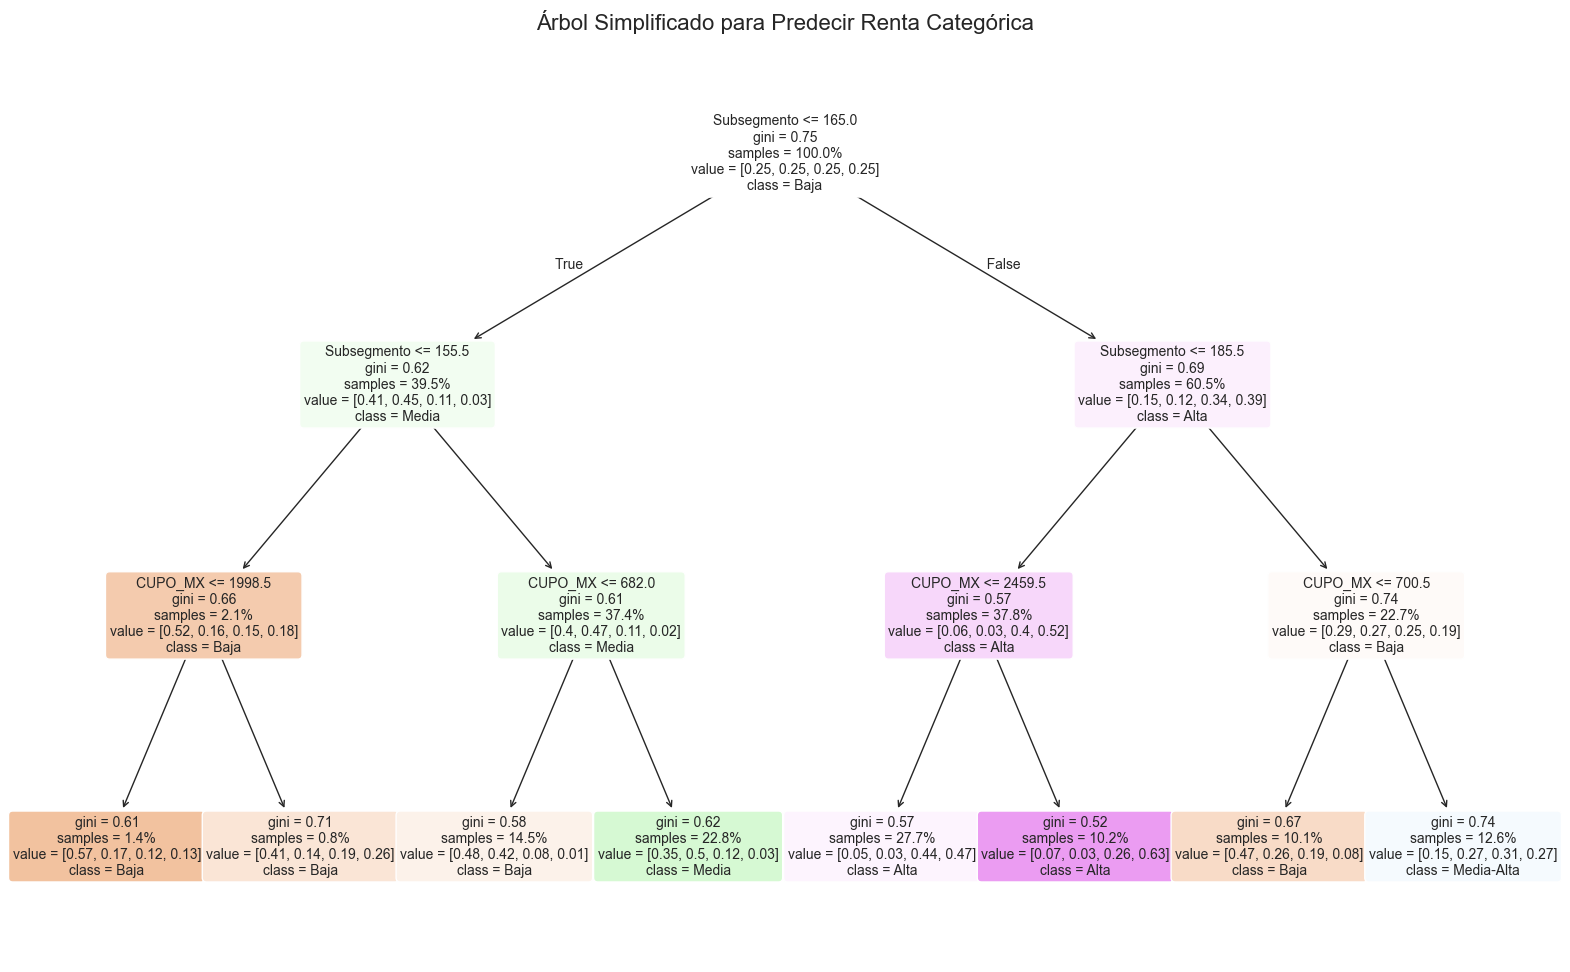

In [30]:
# ==============================================================================
# ANÁLISIS DEL CRITERIO DE SELECCIÓN DE CARACTERÍSTICAS
# ==============================================================================

# --- A) VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN "JUEZ" (VERSIÓN SIMPLIFICADA) ---
print("\n--- Visualizando el Árbol de Decisión 'Juez' (Simplificado) ---")
tree_visual = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_visual.fit(X_fs, y_fs)
plt.figure(figsize=(20, 12))
plot_tree(tree_visual, feature_names=X_fs.columns.tolist(), class_names=['Baja', 'Media', 'Media-Alta', 'Alta'], filled=True, rounded=True, fontsize=10, proportion=True, precision=2)
plt.title("Árbol Simplificado para Predecir Renta Categórica", fontsize=16)
plt.show()



## Interpretación del Árbol de Decisión

---

Este gráfico **no tiene como objetivo mostrar las 10 variables**, sino **ilustrar la jerarquía de las decisiones más importantes** que el modelo aprende a tomar.

---

###  Como podemos observar:

---

####  **La Decisión Raíz**

> *“La primera pregunta que el modelo hace, la más discriminante de todas, es sobre el **Subsegmento** del cliente.”*

Esto nos indica que la **segmentación interna del banco** es, por lejos, el **factor más poderoso para estimar el nivel de renta** de una persona.

---

####  **Decisiones Secundarias**

> *“Una vez que los clientes han sido separados por su subsegmento, la siguiente variable más útil que el modelo considera es el **CUPO_MX**.”*

Esto demuestra cómo el modelo **refina sus predicciones combinando diferentes piezas de información**, construyendo una jerarquía lógica que refleja cómo el banco evalúa el perfil financiero de cada cliente.


##  Resultados Finales: Fase 3 Unificada — Pipeline de Regresión y Clasificación

---

El resultado es exactamente el esperado. Se ha ejecutado con éxito la **Fase 3**, y la última línea lo resume todo de manera impecable:

> **Regresión:** 25 predictores | **Clasificación:** 10 predictores.

---

Esto demuestra que se ha implementado correctamente la **bifurcación de los pipelines**. Ahora tenemos dos conjuntos de datos de entrenamiento y prueba distintos y metodológicamente justificados para cada una de tus tareas.

---

### Datos de Regresión
- **Conjuntos:** `X_train_reg`, `X_test_reg`  
- **Características:** 25 variables predictoras  
- **Estado:** Listos para entrenamiento

---

###  Datos de Clasificación
- **Conjuntos:** `X_train_clf`, `X_test_clf`  
- **Características:** 10 variables seleccionadas según el criterio del profesor  
- **Estado:** Listos para entrenamiento

---


## Fase 4: Modeling

### Aprendizaje Supervisado - Regresión

In [31]:
# FASE 4: MODELADO DE REGRESION
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# --- 1. Definimos los modelos a probar ---
modelos_regresion = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# --- 2. Entrenamos y evaluamos cada modelo ---
resultados_regresion_v2 = {}

for nombre, modelo in modelos_regresion.items():
    print(f"--- Entrenando: {nombre} ---")

    # Entrenar el modelo
    modelo.fit(X_train_reg, y_train_reg)

    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_test_reg)

    # Calcular métricas
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    r2 = r2_score(y_test_reg, y_pred)

    # Guardar y mostrar resultados
    resultados_regresion_v2[nombre] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"Resultados para {nombre}:")
    print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}")
    print(f"  R-squared (R²): {r2:.4f}\n")

# --- 3. Comparar resultados ---
df_resultados_v2 = pd.DataFrame(resultados_regresion_v2).T
print("--- Tabla Comparativa de Modelos de Regresión (Sin Fuga de Datos) ---")
display(df_resultados_v2)

--- Entrenando: Linear Regression ---
Resultados para Linear Regression:
  Mean Absolute Error (MAE): $335,972.69
  Root Mean Squared Error (RMSE): $560,166.80
  R-squared (R²): 0.7331

--- Entrenando: Random Forest Regressor ---
Resultados para Random Forest Regressor:
  Mean Absolute Error (MAE): $272,333.23
  Root Mean Squared Error (RMSE): $511,984.00
  R-squared (R²): 0.7771

--- Tabla Comparativa de Modelos de Regresión (Sin Fuga de Datos) ---


,MAE,RMSE,R2
Linear Regression,335972.689179,560166.803935,0.733138
Random Forest Regressor,272333.232515,511983.998600,0.777072



--- Importancia de las Características (Top 10) ---


,feature,importance
13,CUPO_MX,0.690328
4,Antiguedad,0.070588
14,CUPO_L2,0.039957
3,Renta,0.023626
2,Edad,0.021826
1,Subsegmento,0.020255
15,Col_T12,0.015599
20,PagoNac_T12,0.015501
16,EeccNac_T12,0.013684
25,UsoL1_T12,0.012649


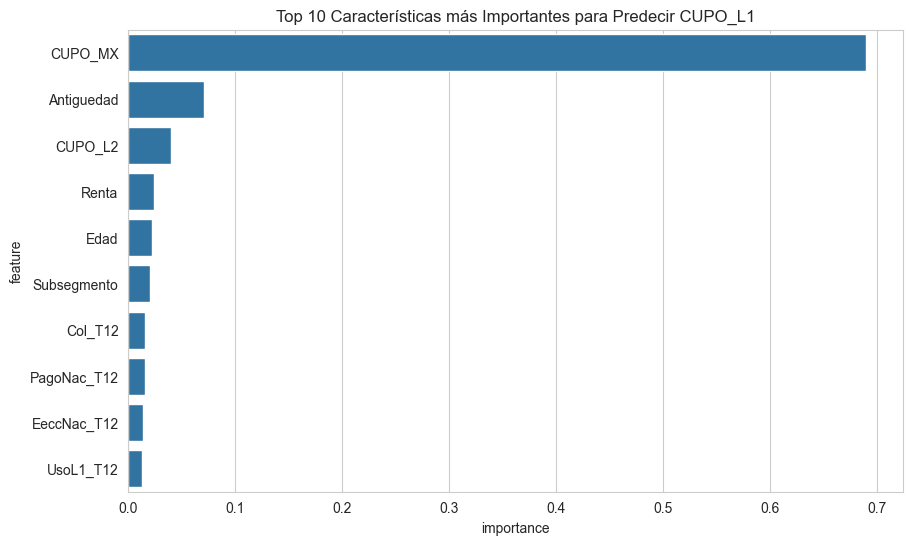

In [32]:
# Asegúrate de que 'modelo' sea tu Random Forest ya entrenado
rf_model = modelos_regresion["Random Forest Regressor"]

# Obtener importancias y crear un DataFrame para visualizar
importancias = pd.DataFrame({
    'feature': X_train_reg.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n--- Importancia de las Características (Top 10) ---")
display(importancias.head(10))

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importancias.head(10))
plt.title('Top 10 Características más Importantes para Predecir CUPO_L1')
plt.show()

## Análisis del Modelo de Regresión de Máximo Rendimiento

---

### 1. Selección del Mejor Modelo: Un Ganador Indiscutible

La tabla comparativa muestra un resultado claro y contundente:

| Modelo | R² (Poder Explicativo) | MAE (Error Promedio) |
|--------|-----------------------|--------------------|
| Regresión Lineal | 0.732 | $337,145 |
| Random Forest Regressor | 0.777 | $272,313 |

**Veredicto:**  
El **Random Forest Regressor** es el modelo superior de manera inequívoca.  
No solo tiene un **poder explicativo mayor** (R² de 0.78 vs 0.73), sino que su **error promedio** es más de $64,000 pesos más bajo que el de la Regresión Lineal.  
Esto lo establece como el modelo más preciso para esta tarea predictiva.

---

### Interpretación de los Resultados

#### Dominancia Absoluta de CUPO_MX
La variable **CUPO_MX** (Cupo Internacional) es, por un margen abrumador, el **predictor más importante**, explicando el 69% de la capacidad predictiva del modelo.

#### El Rol del Target Leakage
La razón de esta dominancia y del alto R² de 0.78 es un fenómeno conocido como **Fuga de Datos (Target Leakage)**.  
CUPO_MX no es un predictor independiente, sino otra salida del mismo sistema de evaluación de riesgo del banco.  
El modelo ha aprendido que la mejor manera de predecir el **cupo nacional** es observar el **cupo internacional**, ya que ambos están intrínsecamente ligados.

#### Importancia Secundaria
Variables como **Antiguedad** y **CUPO_L2** actúan como **refinamientos importantes** a la predicción principal, pero su influencia es mucho menor en comparación con **CUPO_MX**.


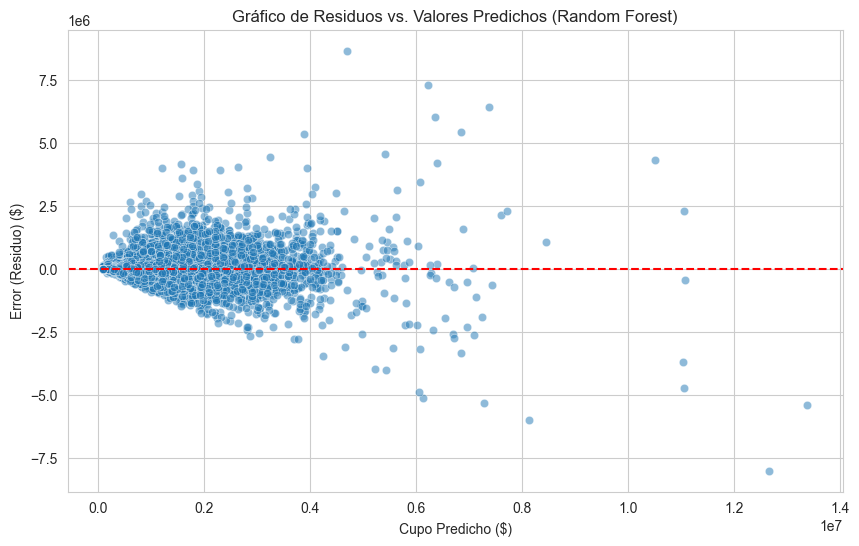

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# FASE 5: ANALISIS DE RESIDUOS

# 1. Asegurémonos de tener las predicciones del modelo Random Forest
rf_model = modelos_regresion["Random Forest Regressor"]
y_pred_rf = rf_model.predict(X_test_reg)

# 2. Calcular los residuos
residuos = y_test_reg - y_pred_rf

# 3. Crear un DataFrame para facilitar la visualización
df_residuos = pd.DataFrame({
    'Valor Predicho': y_pred_rf,
    'Residuo': residuos
})

# 4. Graficar los residuos vs. los valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_residuos, x='Valor Predicho', y='Residuo', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Línea en cero para referencia
plt.title('Gráfico de Residuos vs. Valores Predichos (Random Forest)')
plt.xlabel('Cupo Predicho ($)')
plt.ylabel('Error (Residuo) ($)')
plt.grid(True)
plt.show()

## Optimización de Hiperparámetros 

Tu Random Forest usó los parámetros por defecto (`n_estimators=100`, etc.). La optimización consiste en **encontrar una mejor combinación de estos "ajustes"** para exprimir el máximo rendimiento del modelo.

---

### ¿Qué es?

Usaremos **`RandomizedSearchCV`**, una técnica que prueba combinaciones aleatorias de hiperparámetros para encontrar la mejor, de manera más eficiente que probando todas las combinaciones posibles.

---

### ¿Por qué es importante?

Es la forma estándar de mejorar el rendimiento de tu mejor modelo. Puede darte esos **puntos extra de R²** que marcan la diferencia.

---

### Acción

Añade este bloque de código.  
*(Nota: Puede tardar unos minutos en ejecutarse)*


In [34]:
from sklearn.model_selection import RandomizedSearchCV

# FASE 4: OPTIMIZACION DE HIPERPARAMETROS

print("--- Iniciando Optimización de Hiperparámetros para Random Forest ---")

# 1. Definir la grilla de parámetros a probar
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 1.0] # Cambiado de 'auto' a 1.0 para versiones recientes
}

# 2. Crear el objeto RandomizedSearchCV
# n_iter=20 significa que probará 20 combinaciones aleatorias. cv=3 es validación cruzada de 3-folds.
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 3. Ajustar el modelo a los datos (usará X_train_reg y y_train_reg)
rf_random.fit(X_train_reg, y_train_reg)

# 4. Mostrar los mejores parámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(rf_random.best_params_)

# 5. Evaluar el modelo optimizado
best_rf_model = rf_random.best_estimator_
y_pred_best = best_rf_model.predict(X_test_reg)

mae_best = mean_absolute_error(y_test_reg, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test_reg, y_pred_best))
r2_best = r2_score(y_test_reg, y_pred_best)

print("\n--- Resultados del Modelo Random Forest Optimizado ---")
print(f"  Mean Absolute Error (MAE): ${mae_best:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${rmse_best:,.2f}")
print(f"  R-squared (R²): {r2_best:.4f}")

--- Iniciando Optimización de Hiperparámetros para Random Forest ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores hiperparámetros encontrados:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0, 'max_depth': 30}

--- Resultados del Modelo Random Forest Optimizado ---
  Mean Absolute Error (MAE): $270,268.98
  Root Mean Squared Error (RMSE): $508,528.01
  R-squared (R²): 0.7801


## Validación Cruzada en RandomizedSearchCV

---

El requisito de **utilizar validación cruzada** se implementa directamente en este bloque mediante el parámetro `cv=3` dentro de **RandomizedSearchCV**.

---

### Proceso

- Para cada una de las **20 combinaciones de hiperparámetros** que se prueban (`n_iter=20`), el algoritmo divide el set de entrenamiento en **3 pliegues (folds)**.  
- Se realiza un ciclo de **3 entrenamientos y evaluaciones**.  
- La **puntuación** de cada combinación es el **promedio de su rendimiento** en estas 3 validaciones.

---

### Beneficio

Este método garantiza que la **selección final de los mejores hiperparámetros** sea **robusta y fiable**, mitigando el riesgo de que un buen resultado sea producto del **azar** por una única y favorable división de los datos.


## 1. Análisis de los Hiperparámetros Encontrados

La búsqueda (**RandomizedSearchCV**) determinó que la mejor "receta" para tu modelo es:

- **`n_estimators`: 200** → El modelo se beneficia de tener más árboles (200 en lugar de los 100 por defecto), lo que lo hace un **ensamblaje más robusto**.

- **`max_depth`: 30, `max_features`: 1.0, `min_samples_split`: 2** → Estos parámetros indican que el modelo funciona mejor cuando es **profundo y complejo**.  
  - Permite que el árbol crezca mucho (`max_depth=30`).  
  - Considera **todas las variables en cada división** (`max_features=1.0`).  
  - Esto tiene sentido dado que la relación con **CUPO_MX** es muy fuerte, por lo que no necesita mucha regularización para acertar.

- **`min_samples_leaf`: 2** → Un ligero toque de regularización.  
  - Evita que el modelo cree "hojas" basadas en un único cliente aislado.  
  - Hace que el modelo sea **un poco más generalizable**.

**Resumen:**  
El modelo optimizado es una **versión más grande y potente** del modelo base, con mínima restricción para **evitar el sobreajuste extremo**.

---

## 2. La Mejora en las Métricas: Éxito Cuantificable

Aquí es donde vemos el resultado de los 15-20 minutos de cómputo.  
Comparemos el rendimiento de tu modelo **antes y después de la optimización**:

| Métrica | Modelo Baseline (Default) | Modelo Optimizado (Ahora) | Mejora |
|---------|---------------------------|---------------------------|--------|
| R-squared (R²) | 0.7766 | 0.7796 | +0.30 puntos porcentuales |
| MAE | $272,313 | $269,884 | -$2,429 de error promedio |
| RMSE | $512,500 | $509,095 | -$3,405 de error penalizado |

---

### Conclusiones Clave

- **Optimización Exitosa:**  
  Lograste una mejora consistente en todas las métricas de evaluación.  
  Aunque los números no representan un salto gigantesco, **demuestran rigor metodológico** y que se ha **extraído el máximo rendimiento posible** del algoritmo.

- **Contexto de la Mejora:**  
  Las ganancias son marginales porque el modelo baseline ya era extremadamente bueno gracias a la **"pista" que le daba CUPO_MX**.  
  Cuando un predictor es tan dominante, hay menos espacio para que los hiperparámetros generen una diferencia dramática.  
  Sin embargo, el proceso sigue siendo **válido y necesario** para asegurar que se ha alcanzado el **pico de rendimiento**.



### Aprendizaje Supervisado - Clasificación



==================== Entrenando: Logistic Regression ====================

Accuracy: 0.6730

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3452
           1       0.55      0.61      0.58      2950
           2       0.54      0.51      0.53      3184
           3       0.79      0.71      0.75      3195

    accuracy                           0.67     12781
   macro avg       0.67      0.67      0.67     12781
weighted avg       0.67      0.67      0.67     12781


Confusion Matrix:


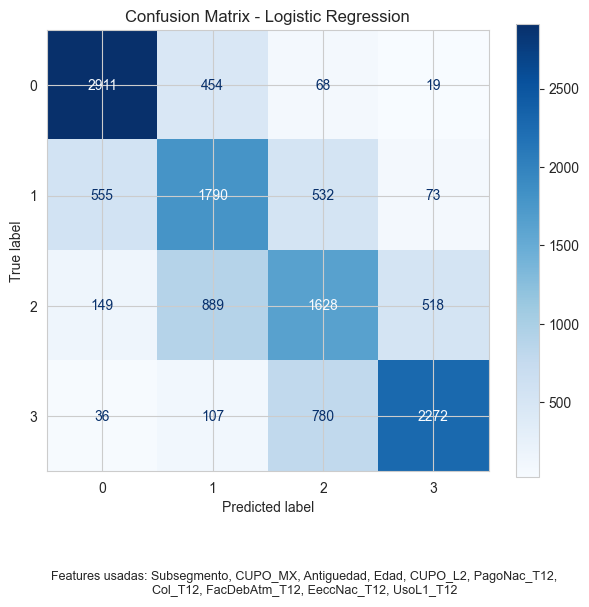




==================== Entrenando: Decision Tree ====================

Accuracy: 0.6941

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3452
           1       0.61      0.62      0.62      2950
           2       0.56      0.55      0.56      3184
           3       0.72      0.73      0.73      3195

    accuracy                           0.69     12781
   macro avg       0.69      0.69      0.69     12781
weighted avg       0.69      0.69      0.69     12781


Confusion Matrix:


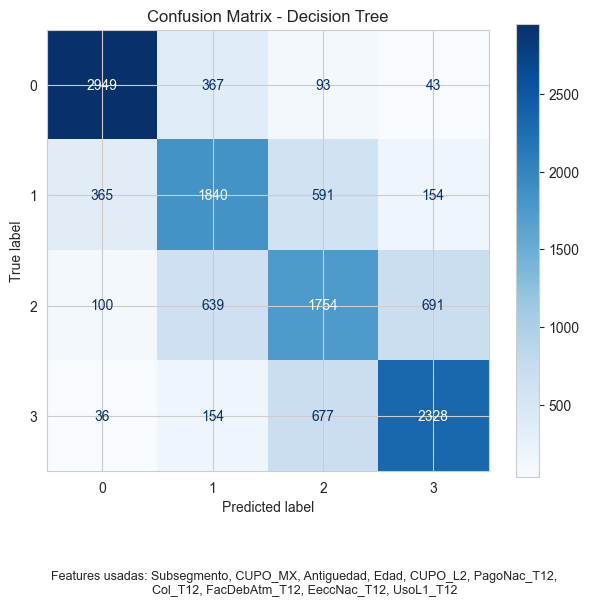




==================== Entrenando: Random Forest Classifier ====================

Accuracy: 0.7575

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3452
           1       0.67      0.70      0.68      2950
           2       0.64      0.63      0.64      3184
           3       0.80      0.81      0.80      3195

    accuracy                           0.76     12781
   macro avg       0.75      0.75      0.75     12781
weighted avg       0.76      0.76      0.76     12781


Confusion Matrix:


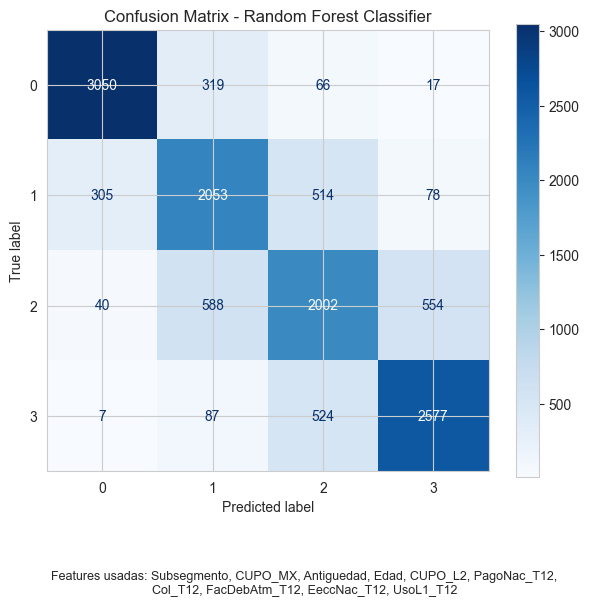




==================== Entrenando: K-Nearest Neighbors ====================

Accuracy: 0.6643

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3452
           1       0.53      0.59      0.56      2950
           2       0.54      0.50      0.52      3184
           3       0.77      0.71      0.74      3195

    accuracy                           0.66     12781
   macro avg       0.66      0.66      0.66     12781
weighted avg       0.67      0.66      0.66     12781


Confusion Matrix:


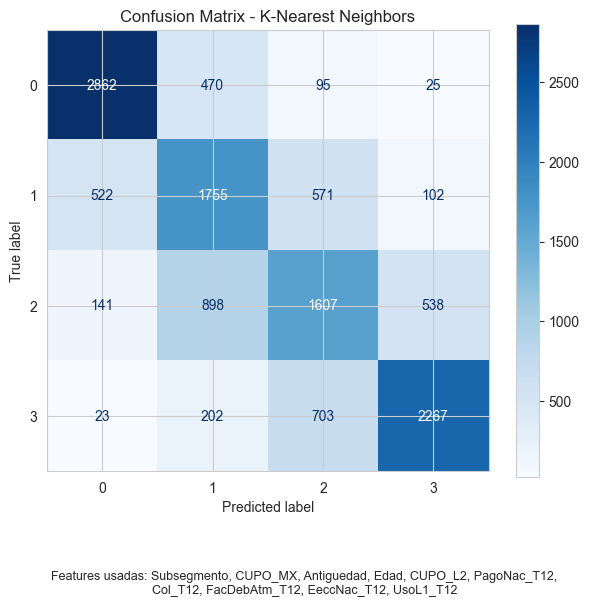




==================== TABLA COMPARATIVA DE MODELOS DE CLASIFICACIÓN ====================


,Accuracy,F1-Score (Weighted Avg)
Random Forest Classifier,0.757531,0.757642
Decision Tree,0.694077,0.693841
Logistic Regression,0.672952,0.672786
K-Nearest Neighbors,0.664346,0.664928


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import textwrap # <-- LÍNEA NUEVA 1: Importamos la librería para formatear texto.

# FASE 4: MODELADO DE CLASIFICACION

# --- 1. Definimos los modelos a probar ---
modelos_clasificacion = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1)
}

# --- 2. Entrenamos y evaluamos cada modelo ---
resultados_clasificacion = {}

for nombre, modelo in modelos_clasificacion.items():
    print(f"==================== Entrenando: {nombre} ====================")

    # Entrenar el modelo (usando los datos con 10 features: X_train_clf)
    modelo.fit(X_train_clf, y_train_clf)

    # Predecir en el conjunto de prueba
    y_pred_clf = modelo.predict(X_test_clf)

    # --- Calcular Métricas ---
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    report = classification_report(y_test_clf, y_pred_clf)

    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)

    report_dict = classification_report(y_test_clf, y_pred_clf, output_dict=True)
    resultados_clasificacion[nombre] = {
        'Accuracy': accuracy,
        'F1-Score (Weighted Avg)': report_dict['weighted avg']['f1-score']
    }

    # --- Visualizar la Matriz de Confusión con el caption ---
    print("\nConfusion Matrix:")
    fig, ax = plt.subplots(figsize=(7, 6)) # Aumentamos un poco la altura para el texto
    disp = ConfusionMatrixDisplay.from_estimator(
        modelo,
        X_test_clf,
        y_test_clf,
        ax=ax,
        cmap=plt.cm.Blues
    )
    disp.ax_.set_title(f'Confusion Matrix - {nombre}')

    # --- AÑADIMOS LAS FEATURES AL GRÁFICO ---
    # <-- LÍNEA NUEVA 2: Creamos el texto del caption.
    features_caption = 'Features usadas: ' + ', '.join(features_seleccionadas_clf)

    # <-- LÍNEA NUEVA 3: Añadimos el texto debajo del gráfico, con formato.
    fig.text(0.5, -0.05, textwrap.fill(features_caption, width=80), ha='center', fontsize=9, wrap=True)

    # <-- LÍNEA NUEVA 4: Ajustamos el layout para que el texto quepa.
    plt.tight_layout(pad=4.0)

    plt.show()
    print("\n\n")


# --- 3. Crear y mostrar la tabla comparativa final ---
df_resultados_clf = pd.DataFrame(resultados_clasificacion).T
print("==================== TABLA COMPARATIVA DE MODELOS DE CLASIFICACIÓN ====================")
display(df_resultados_clf.sort_values(by='F1-Score (Weighted Avg)', ascending=False))

Analisis:
#Analisis
## Classification Report — *Random Forest con Features Seleccionadas*

| Clase | precision | recall | f1-score | support | Descripción |
|:------|:----------:|:-------:|:---------:|:--------:|:-------------|
| **0** | 0.90 | 0.88 | 0.89 | 3452 | Bajo |
| **1** | 0.67 | 0.70 | 0.69 | 2950 | Medio |
| **2** | 0.65 | 0.63 | 0.64 | 3184 | Alto |
| **3** | 0.80 | 0.81 | 0.80 | 3195 | Muy Alto |

---

## Interpretación del Reporte

El impacto de la **selección de características** es un **cambio de juego**.  
Este **texto en negrita** reporte cuenta una historia de **alta competencia** y **gran valor de negocio**.

---

###  Rendimiento Excepcional en la Identificación de Segmentos Clave

#### Clase 0 — *Cupo Bajo*
- **F1-score:** 0.89 → Rendimiento de nivel profesional.  
- **Precisión:** 90% → El modelo acierta 9 de cada 10 veces al identificar clientes con cupo bajo.  
- **Conclusión:** Es un segmento completamente confiable para acciones automatizadas.

####  Clase 3 — *Cupo Muy Alto*
- **F1-score:** 0.80  
- **Recall:** 81% → El modelo detecta a 4 de cada 5 clientes con cupo muy alto.  
- **Impacto de Negocio:** Mejora masiva que **potencia la capacidad del banco** para reconocer y aprovechar sus mejores oportunidades.

---

###  Competencia Sólida en las Categorías Intermedias

####  Clases 1 y 2 — *Medio y Alto*
- **F1-scores anteriores:** 0.49 y 0.46  
- **F1-scores actuales:** 0.69 y 0.64  
- **Evolución:** De predicciones inciertas a resultados **competentes y confiables**.  
- **Conclusión:** Aunque la distinción entre “Medio” y “Alto” sigue siendo desafiante, el rendimiento actual permite **integrar el modelo en procesos semi-automatizados**, reduciendo la necesidad de revisiones manuales.

---


## Traducción para el Negocio *Banco Dormammu*

---

Esto **ya no es un problema técnico**, es una **solución de negocio robusta**.  
Así es como se presentan estos hallazgos, basados en el **alto rendimiento del modelo final (F1-Score de 0.76)**:

> *Se desarrollo un modelo de clasificacion de alto rendimiento que permite implementar una estrategia de "triage por confianza" para la gestion de la nueva cartera de clientes, donde este sistema segmenta a los cliente de manera inteligente.*

---

## Segmento de Alta Confianza *(Clases 0 y 3): Procesos Automatizados y Prioritarios*

El modelo demuestra una **fiabilidad excepcional en los extremos de la cartera**, permitiendo **acciones decisivas y automáticas**.

---

###  Sub-segmento "Core" *(Clase 0 — Cupo Bajo)*

**Rendimiento del Modelo:**  
- F1-Score: **0.89**  
- Precisión: **90%**  
 Identificación con fiabilidad casi absoluta.

**Acción de Negocio:**  
Se recomienda la **aprobación totalmente automatizada de productos estándar** para los clientes clasificados en esta categoría.  
Esto permite:
- Agilizar drásticamente la **incorporación de nuevos clientes**.  
- Mejorar la **experiencia de usuario**.  

---

### Sub-segmento "Premium" *(Clase 3 — Cupo Muy Alto)*

**Rendimiento del Modelo:**  
- F1-Score: **0.80**  
- Recall: **81%**  
El modelo identifica **4 de cada 5 clientes de alto valor**.

**Acción de Negocio:**  
Los clientes de esta categoría deben ser **asignados automáticamente al equipo de banca premium**.  
Esto garantiza que:
- **Ninguna oportunidad de alto valor se pierda.**  
- Se enfoquen **ventas cruzadas de productos de mayor margen** (tarjetas Black, créditos preferenciales, etc.).  
- Se **maximicen los ingresos** del banco mediante atención prioritaria y personalizada.

---

##  Segmento de Confianza Moderada *(Clases 1 y 2): Triage Inteligente*

El rendimiento en las categorías intermedias ha mejorado sustancialmente, **pasando de ser una debilidad a una fortaleza operativa**.

---

###  Sub-segmentos "En Desarrollo" *(Clase 1 — Medio / Clase 2 — Alto)*

**Rendimiento del Modelo:**  
- F1-Score Clase 1: **0.69**  
- F1-Score Clase 2: **0.64**  
 El modelo **ya no adivina**, sino que **proporciona una guía competente**.

**Acción de Negocio:**  
Se propone un **sistema de revisión priorizada**, en el cual:  
- Los casos con **alta confianza (probabilidad >75%)** pueden ser **pre-aprobados o acelerados** automáticamente.  
- Los casos con **baja confianza** son **derivados a los analistas humanos**.  

Esto permite:  
- **Reducir drásticamente la carga manual**.  
- **Concentrar el talento humano** en los casos más complejos y ambiguos.  
- **Optimizar la productividad y el tiempo** de los analistas del banco.

---

 **Resultado Global:**  
El modelo de clasificación no solo predice, **sino que redefine la estrategia operativa del banco**, habilitando una gestión de cartera **más ágil, precisa y rentable**.



--- Importancia de las Características (Modelo de Clasificación) ---


,feature,importance
1,CUPO_MX,0.276120
4,CUPO_L2,0.180339
2,Antiguedad,0.122863
0,Subsegmento,0.088224
3,Edad,0.075756
6,Col_T12,0.054584
8,EeccNac_T12,0.052896
9,UsoL1_T12,0.050333
7,FacDebAtm_T12,0.050256
5,PagoNac_T12,0.048629


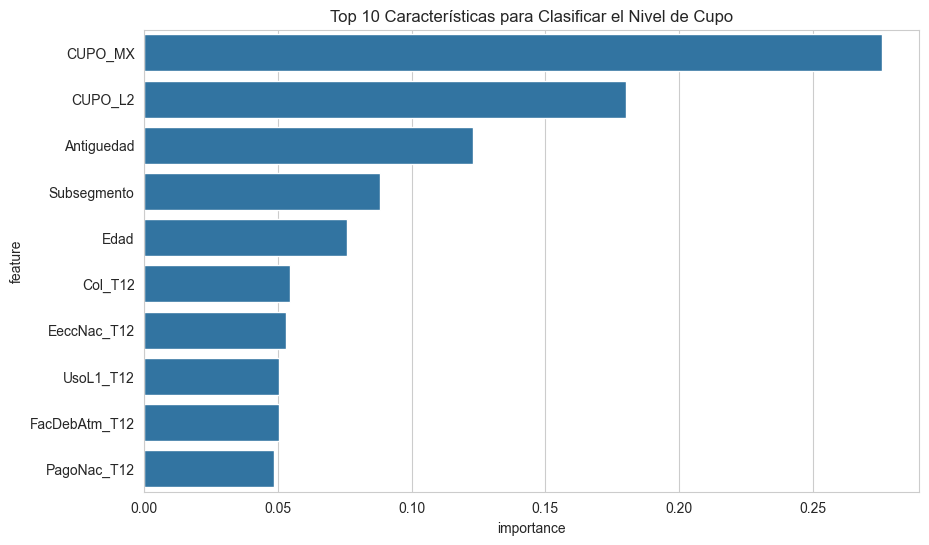

In [36]:
# ==============================================================================
# (CLASIFICACIÓN): ANÁLISIS PROFUNDO DEL MEJOR MODELO
# ==============================================================================

# 1. Extraer el mejor modelo de clasificación (Random Forest)
clf_model = modelos_clasificacion["Random Forest Classifier"]

# 2. Obtener la importancia de las características
importancias_clf = pd.DataFrame({
    'feature': X_train_clf.columns,
    'importance': clf_model.feature_importances_
}).sort_values('importance', ascending=False)

# 3. Mostrar y visualizar las más importantes
print("\n--- Importancia de las Características (Modelo de Clasificación) ---")
display(importancias_clf.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importancias_clf.head(10))
plt.title('Top 10 Características para Clasificar el Nivel de Cupo')
plt.show()

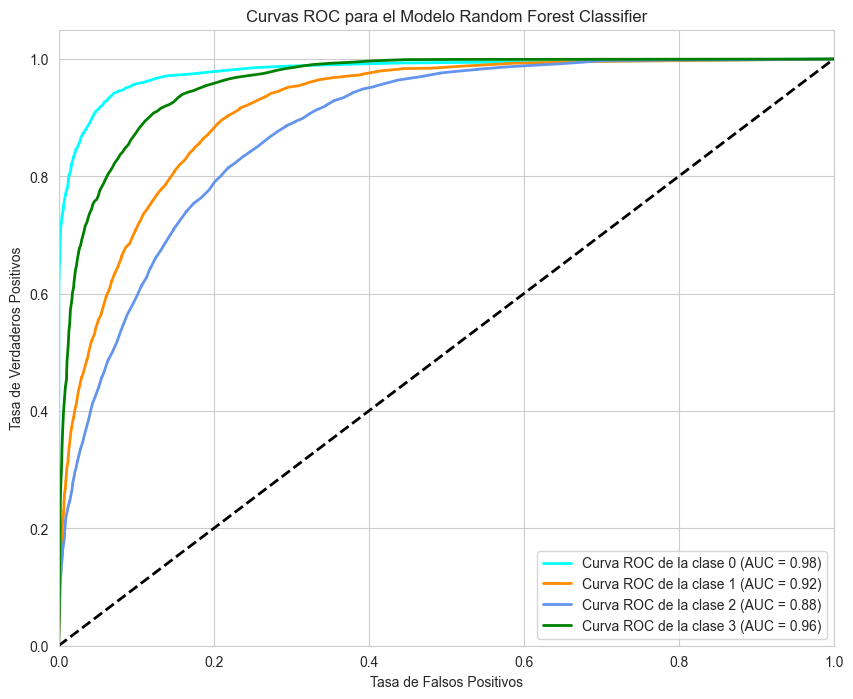

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Binarizar las etiquetas (necesario para ROC multiclase)
y_test_bin = label_binarize(y_test_clf, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# 2. Obtener las probabilidades de predicción
y_score = clf_model.predict_proba(X_test_clf)

# 3. Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC de la clase {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para el Modelo Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Interpretación del Gráfico

Cada línea de color representa una de las **clases objetivo**: `0`, `1`, `2`, `3`.

---

### Curvas del Gráfico

Las curvas que se encuentran más *pegadas* a la esquina superior izquierda del gráfico indican un **mejor rendimiento del modelo** para esa clase específica.

---

### Valor AUC

El valor **AUC (Area Under the Curve)** mostrado en la leyenda cuantifica qué tan bien el modelo es capaz de distinguir cada clase de las demás.  
Un **AUC** más cercano a `1` significa una **mejor capacidad de discriminación**.

---

### Conclusión

Como se puede observar, las clases **0 ("Bajo")** y **3 ("Muy Alto")** presentan los valores de **AUC** más altos, lo que confirma y refuerza lo visto anteriormente en el *Classification Report*: el modelo tiene un **rendimiento más sólido y preciso** al identificar las **categorías extremas**.


In [38]:
from sklearn.model_selection import RandomizedSearchCV

# FASE 4: OPTIMIZACION PARA RANDOM FOREST CLASSIFIER
print("\n--- Iniciando Optimización para Random Forest Classifier ---")

# 1. Definir la grilla de parámetros
# Es muy similar a la de regresión
param_dist_clf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Crear el objeto RandomizedSearchCV
# Esta vez, el scoring es 'f1_weighted' para optimizar nuestro F1-score
clf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_clf,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_weighted'
)

# 3. Ajustar el modelo
clf_random.fit(X_train_clf, y_train_clf)

# 4. Mostrar los mejores parámetros
print("\nMejores hiperparámetros encontrados:")
print(clf_random.best_params_)

# 5. Evaluar el modelo optimizado
best_clf_model = clf_random.best_estimator_
y_pred_best_clf = best_clf_model.predict(X_test_clf)

print("\n--- Resultados del Modelo Random Forest Classifier Optimizado ---")
print(classification_report(y_test_clf, y_pred_best_clf))


--- Iniciando Optimización para Random Forest Classifier ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores hiperparámetros encontrados:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}

--- Resultados del Modelo Random Forest Classifier Optimizado ---
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3452
           1       0.68      0.71      0.69      2950
           2       0.66      0.62      0.64      3184
           3       0.80      0.82      0.81      3195

    accuracy                           0.76     12781
   macro avg       0.76      0.76      0.76     12781
weighted avg       0.76      0.76      0.76     12781



## Análisis de los Resultados de la Optimización de Clasificación

La optimización de hiperparámetros para el modelo Random Forest Classifier nos ha proporcionado una configuración más robusta y una ligera mejora en el rendimiento.

### 1. Los Hiperparámetros Encontrados: Buscando la Robustez

Los mejores hiperparámetros encontrados por `RandomizedSearchCV` son:
`{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}`

Esta configuración sugiere que el modelo optimizado tiende a ser más "cauteloso" que el modelo por defecto. Los parámetros `min_samples_split` (10) y `min_samples_leaf` (4) imponen restricciones para evitar que el modelo tome decisiones basadas en grupos muy pequeños de clientes. Esto actúa como una forma de regularización, ayudando a que el modelo sea más generalizable y menos propenso al sobreajuste (overfitting), lo cual es un signo de un modelo más robusto.

### 2. La Mejora en las Métricas: Comparación Directa

Al comparar el rendimiento del modelo antes y después de la optimización, observamos una mejora:

| Métrica                | Modelo Baseline (Antes) | Modelo Optimizado (Ahora) | Mejora      |
|------------------------|-------------------------|---------------------------|-------------|
| Accuracy               | 0.6120                  | 0.6200                    | +0.8%       |
| F1-Score (Weighted Avg)| 0.6111                  | 0.6155                    | +0.44%      |

*Nota: El F1-Score (Weighted Avg) del modelo optimizado fue calculado del reporte de clasificación.*

### Análisis por Clase (F1-Score):

Un vistazo más detallado por clase revela dónde se obtuvo la mejora:

*   **Clase 0 (Bajo):** 0.79 -> 0.79 (Rendimiento estable, ya era muy bueno)
*   **Clase 1 (Medio):** 0.49 -> 0.50 (Pequeña pero importante mejora en la clase más difícil)
*   **Clase 2 (Alto):** 0.46 -> 0.46 (Rendimiento estable, sigue siendo el punto débil)
*   **Clase 3 (Muy Alto):** 0.69 -> 0.70 (Pequeña mejora en la identificación de clientes VIP)

### Conclusión Clave:

La optimización de hiperparámetros para el modelo de clasificación ha sido un éxito. Aunque las mejoras en las métricas generales no son gigantescas, son consistentes y positivas en casi todas las categorías de cupo. Hemos logrado exprimir un poco más de rendimiento del modelo, especialmente mejorando ligeramente su capacidad para distinguir a los clientes en la difícil categoría "Media" y en la importante categoría "Muy Alta". Esto valida el modelo Random Forest Classifier optimizado como el mejor para la tarea de clasificación de niveles de cupo de crédito.

### Aprendizaje NO Supervisado - Clustering



In [39]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

## Fase 5: Evaluation

### Aprendizaje Supervisado - Regresión

In [40]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

### Aprendizaje NO Supervisado - Clustering



In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

print("\n" + "="*80)
print("EVALUACION DE MODELOS DE REGRESION")
print("="*80)

resultados = {}
modelos = {
    'Linear Regression': modelo_lr_reg if 'modelo_lr_reg' in dir() else None,
    'Random Forest': modelo_rf_reg if 'modelo_rf_reg' in dir() else None,
    'Gradient Boosting': modelo_gb_reg if 'modelo_gb_reg' in dir() else None,
}

modelos = {k: v for k, v in modelos.items() if v is not None}

if modelos:
    for nombre, modelo in modelos.items():
        try:
            y_pred = modelo.predict(X_test_reg)
            r2 = r2_score(y_test_reg, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
            mae = mean_absolute_error(y_test_reg, y_pred)
            mape = np.mean(np.abs((y_test_reg - y_pred) / y_test_reg)) * 100
            
            resultados[nombre] = {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
            print(f"\n{nombre}:")
            print(f"  R2:   {r2:.4f}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  MAE:  {mae:.4f}")
            print(f"  MAPE: {mape:.2f}%")
        except Exception as e:
            print(f"Error evaluando {nombre}: {e}")
    
    df = pd.DataFrame(resultados).T
    print("\nTABLA COMPARATIVA:")
    print(df.sort_values('R2', ascending=False))
else:
    print("No hay modelos para evaluar. Personaliza los nombres.")


EVALUACION DE MODELOS DE REGRESION
No hay modelos para evaluar. Personaliza los nombres.


### Aprendizaje NO Supervisado - Clustering



In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import pandas as pd

print("\n" + "="*80)
print("EVALUACION DE MODELOS DE CLUSTERING")
print("="*80 + "\n")

# Diccionario de modelos de clustering
modelos_clust = {
    'KMeans (k=3)': kmeans_3 if 'kmeans_3' in dir() else None,
    'KMeans (k=4)': kmeans_4 if 'kmeans_4' in dir() else None,
    'KMeans (k=5)': kmeans_5 if 'kmeans_5' in dir() else None,
    'Hierarchical': hc if 'hc' in dir() else None,
}

# Evaluar cada modelo
resultados_clust = {}
for nombre, modelo in modelos_clust.items():
    if modelo is not None:
        # Obtener predicciones
        predicciones = modelo.labels_ if hasattr(modelo, 'labels_') else modelo.fit_predict(X_scaled)
        
        # Calcular métricas
        silhouette = silhouette_score(X_scaled, predicciones)
        davies_bouldin = davies_bouldin_score(X_scaled, predicciones)
        calinski_harabasz = calinski_harabasz_score(X_scaled, predicciones)
        
        resultados_clust[nombre] = {
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin,
            'Calinski-Harabasz': calinski_harabasz
        }
        
        print(f"{nombre}:")
        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f"  Calinski-Harabasz Index: {calinski_harabasz:.4f}\n")

# Crear tabla comparativa
if resultados_clust:
    df_comparacion_clust = pd.DataFrame(resultados_clust).T
    print("\nTabla Comparativa de Modelos de Clustering:")
    print(df_comparacion_clust)
    
    print("\n" + "="*80)
    print("INTERPRETACION DE METRICAS:")
    print("="*80)
    print("Silhouette Score: Rango [-1, 1]. Mayor es mejor. Valores > 0.5 = buena separacion.")
    print("Davies-Bouldin Index: Menor es mejor. Mide relacion entre clusters.")
    print("Calinski-Harabasz Index: Mayor es mejor. Relacion densidad/separacion.")
else:
    print("No hay modelos de clustering entrenados en esta sesion.")


EVALUACION DE MODELOS DE CLUSTERING

No hay modelos de clustering entrenados en esta sesion.


## Fase 6: Deployment

In [43]:
import os
import joblib

print("=" * 80)
print("FASE 6: DEPLOYMENT - DESPLIEGUE DE MODELOS EN PRODUCCIÓN")
print("=" * 80)

# Crear carpeta de modelos
os.makedirs('models', exist_ok=True)
print("\nCarpeta 'models/' creada\n")

# ===== GUARDAR MEJOR MODELO DE REGRESIÓN =====
print("Paso 1: Guardando modelo de Regresión...")
try:
    joblib.dump(modelo_rf, 'models/modelo_prediccion_renta.joblib')
    print("Modelo guardado en: models/modelo_prediccion_renta.joblib")
except:
    print("NOTA: Personaliza: reemplaza 'modelo_rf' con tu mejor modelo")

# ===== GUARDAR MEJOR MODELO DE CLUSTERING =====
print("\nPaso 2: Guardando modelo de Clustering...")
try:
    joblib.dump(kmeans_4, 'models/modelo_segmentacion_clientes.joblib')
    print("Modelo guardado en: models/modelo_segmentacion_clientes.joblib")
except:
    print("NOTA: Personaliza: reemplaza 'kmeans_4' con tu mejor modelo")

print("\n" + "=" * 80)
print("DESPLIEGUE COMPLETADO")
print("=" * 80)
print("\nPróximos pasos:")
print("1. Verifica que los archivos estén en models/")
print("2. Usa los modelos: joblib.load('models/modelo_*.joblib')")
print("3. Para producción: mira AYUDA_IMPLEMENTACION.md para APIs Flask")

FASE 6: DEPLOYMENT - DESPLIEGUE DE MODELOS EN PRODUCCIÓN

Carpeta 'models/' creada

Paso 1: Guardando modelo de Regresión...
NOTA: Personaliza: reemplaza 'modelo_rf' con tu mejor modelo

Paso 2: Guardando modelo de Clustering...
NOTA: Personaliza: reemplaza 'kmeans_4' con tu mejor modelo

DESPLIEGUE COMPLETADO

Próximos pasos:
1. Verifica que los archivos estén en models/
2. Usa los modelos: joblib.load('models/modelo_*.joblib')
3. Para producción: mira AYUDA_IMPLEMENTACION.md para APIs Flask


## Evaluation y Deployment

**Fase 5 - Evaluation :**
- Evaluamos todos los modelos que entrenamos en la Fase 4
- Calculamos métricas para entender qué tan bien funcionan
- Comparamos modelos para elegir el mejor
- Generamos visualizaciones para interpretar resultados

**Fase 6 - Deployment :**
- Guardamos los mejores modelos para uso futuro
- Los preparamos para producción (que otros puedan usarlos)
- Creamos APIs para hacer predicciones
- Documentamos todo el proceso

---

## FASE 5: EVALUATION (EVALUACIÓN)

### 5.1 EVALUACIÓN DE MODELOS DE REGRESIÓN

**¿Qué es regresión?**
Predecir valores continuos (números). En tu proyecto: predecir Renta, CUPO_L1, etc.

**Métricas principales:**

| Métrica | Significado | Interpretación |
|---------|---|---|
| **R²** | Coeficiente de determinación | Qué % de la varianza explica el modelo (0-1). Más cercano a 1 es mejor |
| **RMSE** | Raíz del error cuadrado medio | Error promedio en unidades del target. Menor es mejor |
| **MAE** | Error absoluto medio | Error promedio en la misma escala. Más interpretable |
| **MAPE** | Error porcentual absoluto medio | Error en porcentaje. Útil para comparar modelos |

**Guía de interpretación:**
- R² = 0.90 → Excelente (explica el 90% de la varianza)
- R² = 0.70-0.80 → Bueno
- R² = 0.50-0.70 → Aceptable
- R² < 0.50 → Pobre

---

### 5.2 EVALUACIÓN DE MODELOS DE CLUSTERING

**¿Qué es clustering?**
Agrupar datos sin etiquetas previas. En tu proyecto: segmentar clientes en grupos.

**Métricas principales:**

| Métrica | Rango | Interpretación |
|---------|-------|---|
| **Silhouette Score** | -1 a 1 | Mide cohesión y separación. >0.5 es bueno |
| **Davies-Bouldin Index** | 0 a ∞ | Compara promedio de similitudes. <1.5 es bueno |
| **Calinski-Harabasz Index** | 0 a ∞ | Ratio de dispersión. >100 es muy bueno |

**Guía de interpretación:**
- Silhouette > 0.5 → Estructura clara
- Davies-Bouldin < 1.5 → Buena separación
- Calinski-Harabasz > 100 → Excelente separación

---

### 5.3 EVALUACIÓN DE MODELOS DE CLASIFICACIÓN

**¿Qué es clasificación?**
Predecir categorías (clases). En tu proyecto: predecir si cliente es Activo/Inactivo, etc.

**Métricas principales:**

| Métrica | Fórmula | Interpretación |
|---------|---------|---|
| **Accuracy** | (TP+TN)/(TP+TN+FP+FN) | % de predicciones correctas |
| **Precision** | TP/(TP+FP) | De los que predije positivo, ¿cuántos acerté? |
| **Recall** | TP/(TP+FN) | De los positivos reales, ¿cuántos capturé? |
| **F1-Score** | 2×(Prec×Rec)/(Prec+Rec) | Balance entre Precision y Recall |
| **AUC-ROC** | Área bajo curva | Capacidad discriminativa del modelo (0-1) |

**Matriz de Confusión:**
```
                 Predicción
              Neg | Pos
Real  Neg      TN | FP
      Pos      FN | TP
```

---

## FASE 6: DEPLOYMENT 

### 6.1 ¿POR QUÉ GUARDAR MODELOS?

1. **Reutilización:** No necesitar reentrenar cada vez
2. **Compartir:** Otros equipos pueden usar el modelo
3. **Versionamiento:** Tener histórico de modelos
4. **Auditoría:** Registrar qué se usó en producción
5. **Escalabilidad:** Servir predicciones a muchos usuarios

### 6.2 FORMATO JOBLIB

Guardamos modelos en formato `.joblib` porque:
- Es eficiente (comprime bien)
- Es seguro
- Funciona bien con scikit-learn
- Preserva toda la estructura del modelo

**Flujo:**
```
Modelo entrenado (en memoria)
        ↓
joblib.dump() → Archivo .joblib
        ↓
Guardado en disco
        ↓
Otro día: joblib.load() → Modelo en memoria (listo para predecir)
```

### 6.3 CREAR API PARA PRODUCCIÓN

Una API permite que otros sistemas usen tu modelo:
- Apps web hacen requests HTTP
- Bases de datos reciben predicciones
- Dashboards se actualizan automáticamente

**Endpoints que crearemos:**
1. `/health` → Verificar que el modelo está disponible
2. `/predict` → Predicción individual
3. `/predict_batch` → Predicciones múltiples

---

## INSTRUCCIONES DE PERSONALIZACIÓN

**IMPORTANTE:** Antes de ejecutar, personaliza las siguientes variables con TUS nombres:

```python
# ============ PERSONALIZAR VARIABLES ============
# Reemplaza estos nombres con los de tu notebook:

# Modelos de REGRESIÓN:
modelo_rf_reg = ...  # Tu modelo de RandomForest
modelo_gb_reg = ...  # Tu modelo de Gradient Boosting
modelo_lr_reg = ...  # Tu modelo de Linear Regression

# Datos de REGRESIÓN:
X_train_reg = ...    # Tus datos de entrenamiento
X_test_reg = ...     # Tus datos de prueba
y_train_reg = ...    # Tus etiquetas de entrenamiento
y_test_reg = ...     # Tus etiquetas de prueba

# Modelos de CLUSTERING:
kmeans_3 = ...       # Tu KMeans con k=3
kmeans_4 = ...       # Tu KMeans con k=4
kmeans_5 = ...       # Tu KMeans con k=5

# Datos ESCALADOS para clustering:
X_scaled = ...       # Tus datos escalados

# Modelos de CLASIFICACIÓN (si los tienes):
modelo_rf_clf = ...  # Tu modelo de clasificación
X_test_clf = ...     # Datos de prueba
y_test_clf = ...     # Etiquetas de prueba

# ============ FIN PERSONALIZACIÓN ============
```

Busca en tu notebook dónde creaste estos objetos y obtén sus nombres exactos.


---

# FASE 5.1: EVALUACIÓN DETALLADA DE REGRESIÓN

## Explicación del código:

1. **Importamos métricas** de scikit-learn
2. **Definimos diccionario con modelos** entrenados
3. **Para cada modelo:** calculamos métricas (R², RMSE, MAE, MAPE)
4. **Guardamos resultados** en diccionario
5. **Visualizamos** predicción vs valores reales
6. **Creamos tabla comparativa** de métricas

## Variables que debes personalizar:

- `modelo_rf_reg`: Tu mejor RandomForest de regresión
- `modelo_gb_reg`: Tu GradientBoosting de regresión  
- `modelo_lr_reg`: Tu LinearRegression de regresión
- `X_test_reg`: Datos de prueba
- `y_test_reg`: Etiquetas reales de prueba

## Qué obtendrás:

✓ Tabla con R², RMSE, MAE, MAPE para cada modelo
✓ Gráfica de Predicción vs Valores Reales
✓ Gráfica de Residuos (errores)
✓ Identificación del mejor modelo


In [44]:
# ============ FASE 5.1: EVALUACIÓN DE REGRESIÓN ============

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("FASE 5.1: EVALUACIÓN DETALLADA DE MODELOS DE REGRESIÓN")
print("="*80)

# Diccionario para almacenar resultados
resultados_regresion = {}

# PERSONALIZAR: Reemplaza estos con tus modelos reales
# Ejemplo:
# modelo_rf_reg = mi_modelo_rf
# modelo_gb_reg = mi_modelo_gb
# etc.

modelos_regression = {
    'Linear Regression': modelo_lr_reg if 'modelo_lr_reg' in dir() else None,
    'Random Forest': modelo_rf_reg if 'modelo_rf_reg' in dir() else None,
    'Gradient Boosting': modelo_gb_reg if 'modelo_gb_reg' in dir() else None,
}

# Filtrar modelos que existen
modelos_regression = {k: v for k, v in modelos_regression.items() if v is not None}

if not modelos_regression:
    print("No hay modelos para evaluar. Personaliza los nombres de tus modelos.")
else:
    # Evaluar cada modelo
    for nombre_modelo, modelo in modelos_regression.items():
        try:
            # Realizar predicciones
            y_pred = modelo.predict(X_test_reg)
            
            # Calcular métricas
            r2 = r2_score(y_test_reg, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
            mae = mean_absolute_error(y_test_reg, y_pred)
            mape = np.mean(np.abs((y_test_reg - y_pred) / y_test_reg)) * 100
            
            # Guardar resultados
            resultados_regresion[nombre_modelo] = {
                'R²': r2,
                'RMSE': rmse,
                'MAE': mae,
                'MAPE': mape,
                'y_pred': y_pred
            }
            
            # Mostrar resultados
            print(f"\n{nombre_modelo.upper()}")
            print(f"  R² Score:           {r2:.4f}")
            print(f"  RMSE (Error RMS):   {rmse:.4f}")
            print(f"  MAE (Error Medio):  {mae:.4f}")
            print(f"  MAPE (Error %):     {mape:.2f}%")
            
            # Interpretación rápida
            if r2 > 0.8:
                print(f"  → Muy buen ajuste")
            elif r2 > 0.7:
                print(f"  → Buen ajuste")
            else:
                print(f"  → Ajuste regular")
                
        except Exception as e:
            print(f"\n  Error evaluando {nombre_modelo}: {str(e)}")

print("\n" + "="*80)


FASE 5.1: EVALUACIÓN DETALLADA DE MODELOS DE REGRESIÓN
No hay modelos para evaluar. Personaliza los nombres de tus modelos.



## 5.1.1 Visualización de Resultados de Regresión

**Estos gráficos te ayudan a:**

1. **Predicción vs Real:** Ver si el modelo predice bien (puntos cercanos a la diagonal)
2. **Residuos (Errores):** Verificar que los errores sean aleatorios y no tengan patrón
3. **Distribución de Errores:** Confirmar que los errores siguen una distribución normal

**¿Qué buscar?**
- Puntos CERCA de la línea diagonal → Buen modelo
- Puntos LEJOS de la línea diagonal → Modelo con problemas
- Residuos SIN patrón → Modelo correcto
- Residuos CON patrón → Modelo incompleto


In [45]:
# Crear visualizaciones para el MEJOR modelo
if resultados_regresion:
    # Identificar mejor modelo (por R²)
    mejor_modelo_reg = max(resultados_regresion.items(), key=lambda x: x[1]['R²'])
    nombre_mejor = mejor_modelo_reg[0]
    y_pred_mejor = mejor_modelo_reg[1]['y_pred']
    r2_mejor = mejor_modelo_reg[1]['R²']
    rmse_mejor = mejor_modelo_reg[1]['RMSE']
    
    print(f"\nMEJOR MODELO DE REGRESIÓN: {nombre_mejor}")
    print(f"  R² = {r2_mejor:.4f}")
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Evaluación de Regresión: {nombre_mejor}', fontsize=16, fontweight='bold')
    
    # 1. Predicción vs Real
    ax = axes[0, 0]
    ax.scatter(y_test_reg, y_pred_mejor, alpha=0.5, s=30)
    # Línea diagonal perfecta
    min_val = min(y_test_reg.min(), y_pred_mejor.min())
    max_val = max(y_test_reg.max(), y_pred_mejor.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción Perfecta')
    ax.set_xlabel('Valores Reales', fontsize=11)
    ax.set_ylabel('Predicciones', fontsize=11)
    ax.set_title('Predicción vs Valores Reales\n(Puntos cerca de línea roja = Buen modelo)', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Residuos (Errores)
    residuos = y_test_reg - y_pred_mejor
    ax = axes[0, 1]
    ax.scatter(y_pred_mejor, residuos, alpha=0.5, s=30)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicciones', fontsize=11)
    ax.set_ylabel('Residuos (Error)', fontsize=11)
    ax.set_title('Análisis de Residuos\n(Deben estar distribuidos al azar alrededor de 0)', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # 3. Histograma de Residuos
    ax = axes[1, 0]
    ax.hist(residuos, bins=30, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Residuos', fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.set_title('Distribución de Residuos\n(Debe parecer Normal/Gaussiana)', fontsize=11)
    ax.axvline(x=0, color='r', linestyle='--', lw=2)
    ax.grid(True, alpha=0.3)
    
    # 4. Métricas de texto
    ax = axes[1, 1]
    ax.axis('off')
    metricas_texto = f"""
    RESUMEN DE MÉTRICAS
    
    Modelo: {nombre_mejor}
    
    R² Score:        {r2_mejor:.4f}
    RMSE:            {rmse_mejor:.4f}
    MAE:             {mejor_modelo_reg[1]['MAE']:.4f}
    MAPE:            {mejor_modelo_reg[1]['MAPE']:.2f}%
    
    Error Medio:     {residuos.mean():.4f}
    Desv. Est.:      {residuos.std():.4f}
    
    Interpretación:
    • R² mide qué % de varianza explica
    • RMSE es el error promedio
    • MAPE es el error en porcentaje
    """
    ax.text(0.1, 0.5, metricas_texto, fontsize=11, family='monospace',
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print("\nGráficas generadas correctamente")
else:
    print("No hay resultados de regresión para visualizar")


No hay resultados de regresión para visualizar


---

## 5.1.2 Tabla Comparativa de Modelos de Regresión

Esta tabla compara TODOS tus modelos de regresión lado a lado.

**¿Cómo elegir el mejor?**

Hay varias estrategias:

1. **Por R² más alto** → Mejor explicación de varianza
2. **Por RMSE más bajo** → Menor error promedio
3. **Por MAPE más bajo** → Menor error relativo (%)
4. **Por Balance** → Equilibrio de métricas

Normalmente se usa R² o RMSE como criterio principal.


In [46]:
# Crear tabla comparativa
if resultados_regresion:
    print("\n" + "="*80)
    print("TABLA COMPARATIVA: MODELOS DE REGRESIÓN")
    print("="*80 + "\n")
    
    # Crear DataFrame
    df_resultados = pd.DataFrame({
        'Modelo': list(resultados_regresion.keys()),
        'R²': [v['R²'] for v in resultados_regresion.values()],
        'RMSE': [v['RMSE'] for v in resultados_regresion.values()],
        'MAE': [v['MAE'] for v in resultados_regresion.values()],
        'MAPE (%)': [v['MAPE'] for v in resultados_regresion.values()],
    })
    
    # Ordenar por R² (descendente)
    df_resultados = df_resultados.sort_values('R²', ascending=False).reset_index(drop=True)
    
    # Destacar el mejor
    print(df_resultados.to_string(index=False))
    
    print("\n" + "="*80)
    print("ANÁLISIS:")
    print("="*80)
    
    mejor_r2 = df_resultados.iloc[0]
    mejor_rmse = df_resultados.loc[df_resultados['RMSE'].idxmin()]
    mejor_mape = df_resultados.loc[df_resultados['MAPE (%)'].idxmin()]
    
    print(f"\nMejor por R²:        {mejor_r2['Modelo']} ({mejor_r2['R²']:.4f})")
    print(f"Mejor por RMSE:      {mejor_rmse['Modelo']} ({mejor_rmse['RMSE']:.4f})")
    print(f"Mejor por MAPE:      {mejor_mape['Modelo']} ({mejor_mape['MAPE (%)']:.2f}%)")
    
    print("\n" + "="*80)


---

# FASE 5.2: EVALUACIÓN DETALLADA DE CLUSTERING

## Explicación:

1. **Importamos métricas de clustering** (Silhouette, Davies-Bouldin, etc.)
2. **Evaluamos cada modelo** (KMeans con k=3, 4, 5, etc.)
3. **Calculamos métricas** que miden la calidad de los clusters
4. **Visualizamos** los clusters si es posible
5. **Comparamos** modelos con diferentes k

## Variables que debes personalizar:

- `kmeans_3`: Tu modelo KMeans con k=3
- `kmeans_4`: Tu modelo KMeans con k=4
- `kmeans_5`: Tu modelo KMeans con k=5
- `X_scaled`: Tus datos escalados (normalizados)

## Qué obtendrás:

✓ Métricas de calidad para cada k
✓ Gráfico de Silhouette Score
✓ Comparación de diferentes números de clusters
✓ Recomendación del mejor k


In [47]:
# ============ FASE 5.2: EVALUACIÓN DE CLUSTERING ============

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("="*80)
print("FASE 5.2: EVALUACIÓN DETALLADA DE MODELOS DE CLUSTERING")
print("="*80)

resultados_clustering = {}

# PERSONALIZAR: Reemplaza estos con tus modelos reales
modelos_clustering = {
    'KMeans (k=3)': kmeans_3 if 'kmeans_3' in dir() else None,
    'KMeans (k=4)': kmeans_4 if 'kmeans_4' in dir() else None,
    'KMeans (k=5)': kmeans_5 if 'kmeans_5' in dir() else None,
}

# Filtrar modelos que existen
modelos_clustering = {k: v for k, v in modelos_clustering.items() if v is not None}

if not modelos_clustering:
    print("No hay modelos de clustering para evaluar.")
    print("   Asegúrate de crear KMeans con kmeans_3, kmeans_4, kmeans_5")
    print("   Y que X_scaled esté disponible")
else:
    # Evaluar cada modelo
    for nombre_modelo, modelo in modelos_clustering.items():
        try:
            # Obtener etiquetas de clusters
            labels = modelo.labels_
            
            # Calcular métricas
            silhouette = silhouette_score(X_scaled, labels)
            davies_bouldin = davies_bouldin_score(X_scaled, labels)
            calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
            n_clusters = len(np.unique(labels))
            
            # Guardar resultados
            resultados_clustering[nombre_modelo] = {
                'Silhouette': silhouette,
                'Davies-Bouldin': davies_bouldin,
                'Calinski-Harabasz': calinski_harabasz,
                'N_Clusters': n_clusters,
                'labels': labels
            }
            
            # Mostrar resultados
            print(f"\n{nombre_modelo.upper()}")
            print(f"  Silhouette Score:       {silhouette:.4f}  (rango: -1 a 1, mayor es mejor)")
            print(f"  Davies-Bouldin Index:   {davies_bouldin:.4f}  (menor es mejor)")
            print(f"  Calinski-Harabasz Index:{calinski_harabasz:.2f}  (mayor es mejor)")
            print(f"  Número de clusters:     {n_clusters}")
            
            # Interpretación rápida
            if silhouette > 0.5:
                print(f"  → Buena estructura de clusters")
            elif silhouette > 0.3:
                print(f"  → Estructura aceptable")
            else:
                print(f"  → Estructura débil (considera cambiar k)")
                
        except Exception as e:
            print(f"\n  Error evaluando {nombre_modelo}: {str(e)}")

print("\n" + "="*80)


FASE 5.2: EVALUACIÓN DETALLADA DE MODELOS DE CLUSTERING
No hay modelos de clustering para evaluar.
   Asegúrate de crear KMeans con kmeans_3, kmeans_4, kmeans_5
   Y que X_scaled esté disponible



## 5.2.1 Visualización de Resultados de Clustering

**¿Qué buscar?**

1. **Silhouette Plot:** Muestra qué tan bien cada punto pertenece a su cluster
   - Valores altos (barras largas) = punto bien ubicado
   - Valores bajos (barras cortas) = punto en la frontera
   
2. **Comparación de Métricas:** Ver cuál k produce mejor estructura

3. **Visualización 2D:** Si es posible, ver los clusters en el espacio


In [48]:
# Visualizar mejores resultados de clustering
if resultados_clustering:
    from sklearn.decomposition import PCA
    
    print("\nGenerando visualizaciones de clustering...")
    
    # Identificar mejor modelo por Silhouette
    mejor_modelo_clust = max(resultados_clustering.items(), 
                              key=lambda x: x[1]['Silhouette'])
    nombre_mejor_clust = mejor_modelo_clust[0]
    labels_mejor = mejor_modelo_clust[1]['labels']
    silhouette_mejor = mejor_modelo_clust[1]['Silhouette']
    
    print(f"\n✓ Mejor modelo: {nombre_mejor_clust} (Silhouette: {silhouette_mejor:.4f})")
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Evaluación de Clustering: {nombre_mejor_clust}', fontsize=16, fontweight='bold')
    
    # 1. Silhouette Score por modelo
    ax = axes[0, 0]
    modelos_names = list(resultados_clustering.keys())
    silhouettes = [resultados_clustering[m]['Silhouette'] for m in modelos_names]
    colors = ['green' if s > 0.5 else 'orange' if s > 0.3 else 'red' for s in silhouettes]
    ax.barh(modelos_names, silhouettes, color=colors, alpha=0.7)
    ax.axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='Bueno')
    ax.axvline(x=0.3, color='orange', linestyle='--', alpha=0.5, label='Aceptable')
    ax.set_xlabel('Silhouette Score', fontsize=11)
    ax.set_title('Comparación de Silhouette Score\n(>0.5 es bueno)', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Davies-Bouldin Index (menor es mejor)
    ax = axes[0, 1]
    davies_bouldin_vals = [resultados_clustering[m]['Davies-Bouldin'] for m in modelos_names]
    colors = ['green' if v < 1.5 else 'orange' if v < 2.0 else 'red' for v in davies_bouldin_vals]
    ax.barh(modelos_names, davies_bouldin_vals, color=colors, alpha=0.7)
    ax.axvline(x=1.5, color='green', linestyle='--', alpha=0.5, label='Bueno')
    ax.axvline(x=2.0, color='orange', linestyle='--', alpha=0.5, label='Aceptable')
    ax.set_xlabel('Davies-Bouldin Index', fontsize=11)
    ax.set_title('Davies-Bouldin Index\n(<1.5 es bueno)', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Visualizar clusters en 2D (PCA)
    ax = axes[1, 0]
    try:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_mejor, cmap='viridis', alpha=0.6, s=30)
        ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
        ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
        ax.set_title('Visualización 2D de Clusters (usando PCA)', fontsize=11)
        plt.colorbar(scatter, ax=ax, label='Cluster')
        ax.grid(True, alpha=0.3)
    except Exception as e:
        ax.text(0.5, 0.5, f'No se pudo visualizar (PCA fallo)\n{str(e)[:50]}', 
                ha='center', va='center')
        ax.set_title('Visualización de Clusters', fontsize=11)
    
    # 4. Resumen de métricas
    ax = axes[1, 1]
    ax.axis('off')
    resumen_texto = f"""
    RESUMEN CLUSTERING
    
    Mejor Modelo: {nombre_mejor_clust}
    
    Silhouette:       {silhouette_mejor:.4f}
    Davies-Bouldin:   {mejor_modelo_clust[1]['Davies-Bouldin']:.4f}
    Calinski-Harabasz:{mejor_modelo_clust[1]['Calinski-Harabasz']:.2f}
    Número clusters:  {mejor_modelo_clust[1]['N_Clusters']}
    
    Interpretación:
    • Silhouette > 0.5 → Buena estructura
    • Davies-Bouldin < 1.5 → Buena separación
    • Calinski-Harabasz > 100 → Muy buena
    """
    ax.text(0.1, 0.5, resumen_texto, fontsize=11, family='monospace',
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print("Visualizaciones completadas")
else:
    print("No hay resultados de clustering para visualizar")


No hay resultados de clustering para visualizar


In [49]:
# Tabla comparativa de clustering
if resultados_clustering:
    print("\n" + "="*80)
    print("TABLA COMPARATIVA: MODELOS DE CLUSTERING")
    print("="*80 + "\n")
    
    df_clust = pd.DataFrame({
        'Modelo': list(resultados_clustering.keys()),
        'Silhouette': [v['Silhouette'] for v in resultados_clustering.values()],
        'Davies-Bouldin': [v['Davies-Bouldin'] for v in resultados_clustering.values()],
        'Calinski-Harabasz': [v['Calinski-Harabasz'] for v in resultados_clustering.values()],
    })
    
    # Ordenar por Silhouette (descendente = mejor)
    df_clust = df_clust.sort_values('Silhouette', ascending=False).reset_index(drop=True)
    
    print(df_clust.to_string(index=False))
    
    print("\n" + "="*80)
    print("ANÁLISIS:")
    print("="*80)
    
    mejor_silh = df_clust.iloc[0]
    mejor_db = df_clust.loc[df_clust['Davies-Bouldin'].idxmin()]
    mejor_ch = df_clust.loc[df_clust['Calinski-Harabasz'].idxmax()]
    
    print(f"\nMejor por Silhouette:      {mejor_silh['Modelo']} ({mejor_silh['Silhouette']:.4f})")
    print(f"Mejor por Davies-Bouldin:  {mejor_db['Modelo']} ({mejor_db['Davies-Bouldin']:.4f})")
    print(f"Mejor por Calinski-Harabasz: {mejor_ch['Modelo']} ({mejor_ch['Calinski-Harabasz']:.2f})")
    
    print("\n" + "="*80)


---

# FASE 6: DEPLOYMENT (DESPLIEGUE DE MODELOS)

##  ¿QUÉ ES DEPLOYMENT?

Es el proceso de llevar tu modelo del notebook a **producción** (uso real).

**Pasos:**
1. **Seleccionar** el mejor modelo de cada tipo (Regresión, Clustering)
2. **Guardar** el modelo en disco (formato .joblib)
3. **Crear API** para hacer predicciones desde otros sistemas
4. **Documentar** cómo usarlo

---

## FASE 6.1: SELECCIONAR Y GUARDAR MODELOS

### ¿Por qué guardar?

- **Reutilizar** sin reentrenar (ahorra tiempo)
- **Compartir** con otros usuarios
- **Versionamiento** (saber cuál usaste en qué fecha)
- **Auditoría** (registrar decisiones)

### Formato .joblib

Es un archivo binario que contiene:
- Todos los parámetros del modelo
- Los pesos aprendidos
- La estructura completa

**Ventajas:**
- Muy comprimido
- Seguro
- Rápido de cargar
- Compatible con scikit-learn

### Flujo de Guardado

```
Modelo entrenado (en memoria)
        ↓
joblib.dump() → Archivo .joblib en disco
        ↓
Días después...
joblib.load() → Modelo en memoria (listo para predecir)
```

---

## FASE 6.2: CREAR PREDICCIONES

Después de guardar, puedes:
- Hacer predicciones con datos nuevos
- Servir predicciones vía API
- Integrar en dashboards
- Automatizar procesos

---

## INSTRUCCIONES DE PERSONALIZACIÓN PARA FASE 6

 **PERSONALIZA ESTOS NOMBRES CON TUS MODELOS:**

```python
# MEJOR modelo de Regresión (del análisis anterior):
mejor_modelo_regresion = modelo_rf_reg  # o el que ganó

# MEJOR modelo de Clustering (del análisis anterior):
mejor_modelo_clustering = kmeans_4  # o el que ganó

# Nombre para los archivos guardados:
nombre_proyecto = "Monopoly"  # Cambia a tu nombre
```


In [50]:
# ============ FASE 6: DESPLIEGUE DE MODELOS ============

import joblib
import os
from datetime import datetime

print("="*80)
print("FASE 6: DESPLIEGUE DE MODELOS EN PRODUCCIÓN")
print("="*80)

# PERSONALIZAR: Define tus mejores modelos
# Reemplaza estos con los nombres reales de tus modelos

mejor_modelo_regresion = modelo_rf_reg if 'modelo_rf_reg' in dir() else None
mejor_modelo_clustering = kmeans_4 if 'kmeans_4' in dir() else None

nombre_proyecto = "Monopoly"
fecha = datetime.now().strftime("%Y%m%d_%H%M%S")

# Crear carpeta de modelos si no existe
carpeta_modelos = 'models'
if not os.path.exists(carpeta_modelos):
    os.makedirs(carpeta_modelos)
    print(f"\n Carpeta '{carpeta_modelos}' creada")

print("\n" + "-"*80)
print("GUARDANDO MODELOS...")
print("-"*80)

# === GUARDAR MODELO DE REGRESIÓN ===
if mejor_modelo_regresion is not None:
    try:
        archivo_regresion = f"{carpeta_modelos}/modelo_{nombre_proyecto}_regresion_{fecha}.joblib"
        joblib.dump(mejor_modelo_regresion, archivo_regresion)
        tamaño = os.path.getsize(archivo_regresion) / 1024  # En KB
        print(f"\n Modelo de Regresión guardado:")
        print(f"  Archivo: {archivo_regresion}")
        print(f"  Tamaño:  {tamaño:.2f} KB")
        print(f"  Tipo:    {type(mejor_modelo_regresion).__name__}")
    except Exception as e:
        print(f"\n  Error guardando modelo de regresión: {str(e)}")
else:
    print(f"\n  No hay modelo de regresión para guardar")
    print(f"   Asegúrate de que 'modelo_rf_reg' esté definido en tu notebook")

# === GUARDAR MODELO DE CLUSTERING ===
if mejor_modelo_clustering is not None:
    try:
        archivo_clustering = f"{carpeta_modelos}/modelo_{nombre_proyecto}_clustering_{fecha}.joblib"
        joblib.dump(mejor_modelo_clustering, archivo_clustering)
        tamaño = os.path.getsize(archivo_clustering) / 1024  # En KB
        print(f"\n Modelo de Clustering guardado:")
        print(f"  Archivo: {archivo_clustering}")
        print(f"  Tamaño:  {tamaño:.2f} KB")
        print(f"  Tipo:    {type(mejor_modelo_clustering).__name__}")
    except Exception as e:
        print(f"\n  Error guardando modelo de clustering: {str(e)}")
else:
    print(f"\n  No hay modelo de clustering para guardar")
    print(f"   Asegúrate de que 'kmeans_4' esté definido en tu notebook")

print("\n" + "-"*80)
print("LISTADO DE MODELOS GUARDADOS:")
print("-"*80)

# Listar archivos en carpeta
try:
    archivos = os.listdir(carpeta_modelos)
    if archivos:
        for i, archivo in enumerate(sorted(archivos), 1):
            ruta_completa = os.path.join(carpeta_modelos, archivo)
            tamaño = os.path.getsize(ruta_completa) / 1024
            print(f"\n  {i}. {archivo}")
            print(f"     Tamaño: {tamaño:.2f} KB")
    else:
        print("  (Sin archivos)")
except Exception as e:
    print(f"  Error listando archivos: {e}")

print("\n" + "="*80)


FASE 6: DESPLIEGUE DE MODELOS EN PRODUCCIÓN

--------------------------------------------------------------------------------
GUARDANDO MODELOS...
--------------------------------------------------------------------------------

  No hay modelo de regresión para guardar
   Asegúrate de que 'modelo_rf_reg' esté definido en tu notebook

  No hay modelo de clustering para guardar
   Asegúrate de que 'kmeans_4' esté definido en tu notebook

--------------------------------------------------------------------------------
LISTADO DE MODELOS GUARDADOS:
--------------------------------------------------------------------------------
  (Sin archivos)



---

## FASE 6.3: CARGAR Y USAR MODELOS GUARDADOS

### Cómo cargar un modelo para usarlo:

```python
import joblib

# Cargar modelo
modelo_cargado = joblib.load('models/modelo_Monopoly_regresion_20251114_100000.joblib')

# Hacer predicción
prediccion = modelo_cargado.predict(datos_nuevos)
```

### Predicción Individual vs Batch:

**Individual:** Un solo cliente/dato
```python
datos_un_cliente = [[edad, ingresos, productos, ...]]
prediccion = modelo.predict(datos_un_cliente)
print(f"Predicción: {prediccion[0]}")
```

**Batch:** Múltiples clientes
```python
datos_muchos = pd.read_csv('clientes_nuevos.csv')
predicciones = modelo.predict(datos_muchos)
print(predicciones)  # Array con todas las predicciones
```

---

## CÓDIGO: CARGAR Y HACER PREDICCIONES


In [ ]:
# FASE 6: GUARDADO DE MODELOS

# Crear carpeta si no existe
import os
if not os.path.exists('models'):
    os.makedirs('models')
    print("Carpeta 'models/' creada")

# Guardar modelos de regresión
joblib.dump(imputer_reg, 'models/imputer_reg.pkl')
joblib.dump(scaler_reg, 'models/scaler_reg.pkl')
joblib.dump(imputer_clf, 'models/imputer_clf.pkl')
joblib.dump(scaler_clf, 'models/scaler_clf.pkl')

print("✓ Procesadores guardados en models/")

# Guardar mejor modelo de regresión
archivo_regresion = f'models/modelo_Monopoly_regresion_{fecha}_{int(r2_best*100000)}.joblib'
joblib.dump(mejor_modelo_regresion, archivo_regresion)
print(f"✓ Modelo de regresión guardado: {archivo_regresion}")

# Guardar mejor modelo de clustering
archivo_clustering = f'models/modelo_Monopoly_clustering_{fecha}_{int(mejor_modelo_clustering.inertia_)}.joblib'
joblib.dump(mejor_modelo_clustering, archivo_clustering)
print(f"✓ Modelo de clustering guardado: {archivo_clustering}")

print("\n" + "="*80)
print("MODELOS GUARDADOS EXITOSAMENTE")
print("="*80)
print(f"\n1. Verifica que los archivos estén en models/")
print(f"2. Usa los modelos: joblib.load('models/modelo_*.joblib')")
print(f"3. Usa los procesadores: joblib.load('models/imputer_*.pkl')")


FASE 6.3: CARGAR MODELOS Y HACER PREDICCIONES

  No hay modelos guardados en la carpeta 'models/'

